In [ ]:
#Import the necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import plotly.express as px # data visualization
import plotly.graph_objs as go # data visualization
from plotly.subplots import make_subplots # data visualization

from sklearn.linear_model import LinearRegression # linear regression from scikit learn
import statsmodels.api as sm # statsmodel for ols linear regression model
import scipy.stats as stats # statistical function
from sklearn.linear_model import Lasso # lasso regression model
from sklearn.linear_model import LassoCV # lassso cross validation


import warnings
warnings.filterwarnings('ignore')

## What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

## 💪 Competition challenge

Create a report that covers the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

## 🔎 Data Wrangling

In [ ]:
# Read the CSV file
df_food = pd.read_csv('/content/nutrition.csv')

# Display the DataFrame
df_food

FDC_ID                                               Item  \
0     167512  Pillsbury Golden Layer Buttermilk Biscuits, Ar...   
1     167513  Pillsbury, Cinnamon Rolls with Icing, refriger...   
2     167514  Kraft Foods, Shake N Bake Original Recipe, Coa...   
3     167515     George Weston Bakeries, Thomas English Muffins   
4     167516         Waffles, buttermilk, frozen, ready-to-heat   
...      ...                                                ...   
7788  175300         Game meat, buffalo, water, cooked, roasted   
7789  175301                                Game meat, elk, raw   
7790  175302                    Game meat, elk, cooked, roasted   
7791  175303                               Game meat, goat, raw   
7792  175304                   Game meat, goat, cooked, roasted   

                           Category    Calories  Protein Carbohydrate  \
0                    Baked Products  307.0 kcal   5.88 g      41.18 g   
1                    Baked Products  330.0 kcal   4.34 g      53.42 g   
2                    Baked Products  377.0 kcal    6.1 g       79.8 g   
3                    Baked Products  232.0 kcal    8.0 g       46.0 g   
4                    Baked Products  273.0 kcal   6.58 g      41.05 g   
...                             ...         ...      ...          ...   
7788  Lamb, Veal, and Game Products  131.0 kcal  26.83 g        0.0 g   
7789  Lamb, Veal, and Game Products  111.0 kcal  22.95 g        0.0 g   
7790  Lamb, Veal, and Game Products  146.0 kcal  30.19 g        0.0 g   
7791  Lamb, Veal, and Game Products  109.0 kcal   20.6 g        0.0 g   
7792  Lamb, Veal, and Game Products  143.0 kcal   27.1 g        0.0 g   

     Total fat Cholesterol  Fiber    Water Alcohol Vitamin C  
0      13.24 g      0.0 mg  1.2 g   35.5 g     NaN       NaN  
1      11.27 g      0.0 mg  1.4 g  27.86 g     NaN    0.1 mg  
2        3.7 g         NaN    NaN    3.2 g     NaN       NaN  
3        1.8 g         NaN    NaN   42.6 g     NaN       NaN  
4       9.22 g     15.0 mg  2.2 g  40.34 g   0.0 g    0.0 mg  
...        ...         ...    ...      ...     ...       ...  
7788     1.8 g     61.0 mg  0.0 g  68.81 g     NaN    0.0 mg  
7789    1.45 g     55.0 mg  0.0 g  74.38 g     NaN    0.0 mg  
7790     1.9 g     73.0 mg  0.0 g  66.28 g     NaN    0.0 mg  
7791    2.31 g     57.0 mg  0.0 g  75.84 g     NaN    0.0 mg  
7792    3.03 g     75.0 mg  0.0 g  68.21 g   0.0 g    0.0 mg  

[7793 rows x 12 columns]

In [ ]:
# Rename the columns of the DataFrame `df_food` by replacing any spaces with underscores and converting the column names to lowercase

df_food.columns = df_food.columns.str.replace(' ', '_').str.lower()

# Display the information of `df_food` DataFrame
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fdc_id        7793 non-null   int64 
 1   item          7793 non-null   object
 2   category      7793 non-null   object
 3   calories      7793 non-null   object
 4   protein       7793 non-null   object
 5   carbohydrate  7793 non-null   object
 6   total_fat     7793 non-null   object
 7   cholesterol   7394 non-null   object
 8   fiber         7231 non-null   object
 9   water         7793 non-null   object
 10  alcohol       5399 non-null   object
 11  vitamin_c     7332 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.7+ KB


### Transform data and adjust data type of calories, protein, carbohydrate, total_fat, cholesterol, fiber, water, alcohol, vitamin_c

In [ ]:
# Transform data in calories column
df_food.calories = df_food.calories.str.replace(' kcal', '').astype(float)

# Transform nutrients data in df_food columns that counted in gram
nutrients_in_gram = ['protein', 'carbohydrate', 'total_fat', 'fiber', 'water', 'alcohol']

for col in nutrients_in_gram:
    df_food[col] = df_food[col].str.replace(' g', '').astype(float)

# Transform nutrients data in df_food columns that counted in mg
nutrients_in_mg = ['cholesterol', 'vitamin_c']
for col in nutrients_in_mg:
    df_food[col] = df_food[col].str.replace(' mg', '').astype(float)

In [ ]:
# Display the information of `df_food` DataFrame
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fdc_id        7793 non-null   int64  
 1   item          7793 non-null   object 
 2   category      7793 non-null   object 
 3   calories      7793 non-null   float64
 4   protein       7793 non-null   float64
 5   carbohydrate  7793 non-null   float64
 6   total_fat     7793 non-null   float64
 7   cholesterol   7394 non-null   float64
 8   fiber         7231 non-null   float64
 9   water         7793 non-null   float64
 10  alcohol       5399 non-null   float64
 11  vitamin_c     7332 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 730.7+ KB


In [ ]:
df_food

fdc_id                                               item  \
0     167512  Pillsbury Golden Layer Buttermilk Biscuits, Ar...   
1     167513  Pillsbury, Cinnamon Rolls with Icing, refriger...   
2     167514  Kraft Foods, Shake N Bake Original Recipe, Coa...   
3     167515     George Weston Bakeries, Thomas English Muffins   
4     167516         Waffles, buttermilk, frozen, ready-to-heat   
...      ...                                                ...   
7788  175300         Game meat, buffalo, water, cooked, roasted   
7789  175301                                Game meat, elk, raw   
7790  175302                    Game meat, elk, cooked, roasted   
7791  175303                               Game meat, goat, raw   
7792  175304                   Game meat, goat, cooked, roasted   

                           category  calories  protein  carbohydrate  \
0                    Baked Products     307.0     5.88         41.18   
1                    Baked Products     330.0     4.34         53.42   
2                    Baked Products     377.0     6.10         79.80   
3                    Baked Products     232.0     8.00         46.00   
4                    Baked Products     273.0     6.58         41.05   
...                             ...       ...      ...           ...   
7788  Lamb, Veal, and Game Products     131.0    26.83          0.00   
7789  Lamb, Veal, and Game Products     111.0    22.95          0.00   
7790  Lamb, Veal, and Game Products     146.0    30.19          0.00   
7791  Lamb, Veal, and Game Products     109.0    20.60          0.00   
7792  Lamb, Veal, and Game Products     143.0    27.10          0.00   

      total_fat  cholesterol  fiber  water  alcohol  vitamin_c  
0         13.24          0.0    1.2  35.50      NaN        NaN  
1         11.27          0.0    1.4  27.86      NaN        0.1  
2          3.70          NaN    NaN   3.20      NaN        NaN  
3          1.80          NaN    NaN  42.60      NaN        NaN  
4          9.22         15.0    2.2  40.34      0.0        0.0  
...         ...          ...    ...    ...      ...        ...  
7788       1.80         61.0    0.0  68.81      NaN        0.0  
7789       1.45         55.0    0.0  74.38      NaN        0.0  
7790       1.90         73.0    0.0  66.28      NaN        0.0  
7791       2.31         57.0    0.0  75.84      NaN        0.0  
7792       3.03         75.0    0.0  68.21      0.0        0.0  

[7793 rows x 12 columns]

In [ ]:
df_food.category.value_counts()

Beef Products                          954
Vegetables and Vegetable Products      814
Baked Products                         517
Lamb, Veal, and Game Products          464
Poultry Products                       383
Beverages                              366
Sweets                                 358
Fruits and Fruit Juices                355
Baby Foods                             345
Pork Products                          336
Fast Foods                             312
Dairy and Egg Products                 291
Legumes and Legume Products            290
Finfish and Shellfish Products         264
Soups, Sauces, and Gravies             254
Fats and Oils                          216
Breakfast Cereals                      195
Cereal Grains and Pasta                181
Snacks                                 176
Sausages and Luncheon Meats            167
American Indian/Alaska Native Foods    165
Nut and Seed Products                  137
Restaurant Foods                       109
Meals, Entr

### Identify missing values and duplicate values

In [ ]:
# Identify missing values
def nutrition_info(df):
    nutrition = pd.DataFrame(index=df.columns)
    nutrition['Data Type'] = df.dtypes
    nutrition['Non-null Values'] = df.count()
    nutrition['Null Values'] = df.isnull().sum()
    nutrition['Percentage of Null Values'] = round((df.isnull().mean())*100, 2)
    nutrition['Unique Values Count'] = df.nunique()
    return nutrition

nutrition_info(df_food)

Data Type  Non-null Values  Null Values  \
fdc_id           int64             7793            0   
item            object             7793            0   
category        object             7793            0   
calories       float64             7793            0   
protein        float64             7793            0   
carbohydrate   float64             7793            0   
total_fat      float64             7793            0   
cholesterol    float64             7394          399   
fiber          float64             7231          562   
water          float64             7793            0   
alcohol        float64             5399         2394   
vitamin_c      float64             7332          461   

              Percentage of Null Values  Unique Values Count  
fdc_id                             0.00                 7793  
item                               0.00                 7793  
category                           0.00                   25  
calories                           0.00                  667  
protein                            0.00                 2638  
carbohydrate                       0.00                 3135  
total_fat                          0.00                 2366  
cholesterol                        5.12                  312  
fiber                              7.21                  237  
water                              0.00                 4163  
alcohol                           30.72                   48  
vitamin_c                          5.92                  549

In [ ]:
# Identify duplicate values
df_food[df_food.duplicated(keep=False)]

Empty DataFrame
Columns: [fdc_id, item, category, calories, protein, carbohydrate, total_fat, cholesterol, fiber, water, alcohol, vitamin_c]
Index: []

In [ ]:
# Create a copy of df_food DataFrame and fill missing values with 0
df_food_1 = df_food.copy()
df_food_1.fillna(0, inplace=True)
nutrition_info(df_food_1)

Data Type  Non-null Values  Null Values  \
fdc_id           int64             7793            0   
item            object             7793            0   
category        object             7793            0   
calories       float64             7793            0   
protein        float64             7793            0   
carbohydrate   float64             7793            0   
total_fat      float64             7793            0   
cholesterol    float64             7793            0   
fiber          float64             7793            0   
water          float64             7793            0   
alcohol        float64             7793            0   
vitamin_c      float64             7793            0   

              Percentage of Null Values  Unique Values Count  
fdc_id                              0.0                 7793  
item                                0.0                 7793  
category                            0.0                   25  
calories                            0.0                  667  
protein                             0.0                 2638  
carbohydrate                        0.0                 3135  
total_fat                           0.0                 2366  
cholesterol                         0.0                  312  
fiber                               0.0                  237  
water                               0.0                 4163  
alcohol                             0.0                   48  
vitamin_c                           0.0                  549

For now, we create another copy of df_food dataframe for analysis that required all non-null values.
However we can keep the original dataframe because the linear model required calories, protein, carbohydrate, and total_fat columns. There isn't any missing values in those columns.

## 📈 Data Analysis and Data Visualization

### 1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?

In [ ]:
df_fruit = df_food[df_food['category']=='Fruits and Fruit Juices']
df_1 = df_fruit.sort_values(by='vitamin_c', ascending=False).head(10)
df_1

fdc_id                                               item  \
5220  171686                 Acerola, (west indian cherry), raw   
5221  171687                                 Acerola juice, raw   
5285  173044                                Guavas, common, raw   
5059  168152                      Jujube, Chinese, fresh, dried   
5126  169087                                     Litchis, dried   
5322  173963                      Currants, european black, raw   
5052  167806                                      Baobab powder   
5118  168211                     Kiwifruit, ZESPRI SunGold, raw   
5345  174686                                Guava sauce, cooked   
5190  169923  Orange juice, frozen concentrate, unsweetened,...   

                     category  calories  protein  carbohydrate  total_fat  \
5220  Fruits and Fruit Juices      32.0     0.40          7.69       0.30   
5221  Fruits and Fruit Juices      23.0     0.40          4.80       0.30   
5285  Fruits and Fruit Juices      68.0     2.55         14.32       0.95   
5059  Fruits and Fruit Juices     281.0     4.72         72.52       0.50   
5126  Fruits and Fruit Juices     277.0     3.80         70.70       1.20   
5322  Fruits and Fruit Juices      63.0     1.40         15.38       0.41   
5052  Fruits and Fruit Juices     250.0     3.69         79.65       0.47   
5118  Fruits and Fruit Juices      63.0     1.02         15.79       0.28   
5345  Fruits and Fruit Juices      36.0     0.32          9.48       0.14   
5190  Fruits and Fruit Juices     148.0     2.40         35.19       0.25   

      cholesterol  fiber  water  alcohol  vitamin_c  
5220          0.0    1.1  91.41      0.0     1677.6  
5221          0.0    0.3  94.30      0.0     1600.0  
5285          0.0    5.4  80.80      0.0      228.3  
5059          0.0    6.0  20.19      NaN      217.6  
5126          0.0    4.6  22.30      0.0      183.0  
5322          0.0    NaN  81.96      NaN      181.0  
5052          NaN   44.5  10.92      NaN      173.2  
5118          0.0    1.4  82.44      0.0      161.3  
5345          0.0    3.6  89.56      0.0      146.4  
5190          0.0    1.0  60.57      0.0      144.8

In [ ]:
df_2 = df_food.sort_values(by='vitamin_c', ascending=False).head(20)
df_2

fdc_id                                               item  \
3449  173487  Babyfood, GERBER, 2nd Foods, apple, carrot and...   
2316  173237  Beverages, Orange-flavor drink, breakfast type...   
2140  167707  Beverages, fruit-flavored drink, powder, with ...   
1454  169373                  Peppers, sweet, red, freeze-dried   
5220  171686                 Acerola, (west indian cherry), raw   
5221  171687                                 Acerola juice, raw   
2373  174143  Beverages, tea, green, instant, decaffeinated,...   
1619  170075                               Chives, freeze-dried   
7016  170921                      Spices, coriander leaf, dried   
2139  167681  Beverages, fruit-flavored drink, dry powdered ...   
983   169692  Gelatin desserts, dry mix, reduced calorie, wi...   
637   173136  Formulated bar, MARS SNACKFOOD US, SNICKERS MA...   
1982  168998          Rose Hips, wild (Northern Plains Indians)   
665   174779  Snacks, candy rolls, yogurt-covered, fruit fla...   
3185  167731  Babyfood, cereal, rice with pears and apple, d...   
2321  173651  Beverages, Orange-flavor drink, breakfast type...   
1810  170497                     Peppers, hot chili, green, raw   
4331  173002  Cereals ready-to-eat, RALSTON Enriched Wheat B...   
2314  173235  Beverages, orange-flavor drink, breakfast type...   
5285  173044                                Guavas, common, raw   

                                 category  calories  protein  carbohydrate  \
3449                           Baby Foods      64.0     1.10         14.82   
2316                            Beverages     217.0     3.60         85.90   
2140                            Beverages     227.0     0.25         91.00   
1454    Vegetables and Vegetable Products     314.0    17.90         68.70   
5220              Fruits and Fruit Juices      32.0     0.40          7.69   
5221              Fruits and Fruit Juices      23.0     0.40          4.80   
2373                            Beverages     378.0     0.00         94.45   
1619    Vegetables and Vegetable Products     311.0    21.20         64.29   
7016                     Spices and Herbs     279.0    21.93         52.10   
2139                            Beverages     218.0     0.45         87.38   
983                                Sweets     345.0    55.30         33.30   
637                                Snacks     386.0    21.91         50.30   
1982  American Indian/Alaska Native Foods     162.0     1.60         38.22   
665                                Snacks     359.0     0.46         74.64   
3185                           Baby Foods     389.0     6.60         88.50   
2321                            Beverages     172.0     0.10         42.90   
1810    Vegetables and Vegetable Products      40.0     2.00          9.46   
4331                    Breakfast Cereals     390.0    10.21         79.77   
2314                            Beverages     386.0     0.00         98.94   
5285              Fruits and Fruit Juices      68.0     2.55         14.32   

      total_fat  cholesterol  fiber  water  alcohol  vitamin_c  
3449       0.00          2.0    1.2  83.83      0.0     2732.0  
2316       0.00          0.0    3.8   1.80      0.0     2400.0  
2140       0.16          0.0    2.2   1.32      0.0     2400.0  
1454       3.00          0.0   21.3   2.00      0.0     1900.0  
5220       0.30          0.0    1.1  91.41      0.0     1677.6  
5221       0.30          0.0    0.3  94.30      0.0     1600.0  
2373       0.00          0.0    0.0   5.09      0.0     1342.3  
1619       3.50          0.0   26.2   2.00      0.0      660.0  
7016       4.78          0.0   10.4   7.30      0.0      566.7  
2139       0.04          0.0    0.1   1.84      0.0      560.0  
983        0.00          0.0    0.0   6.70      NaN      490.0  
637       10.79          4.0    6.7  14.00      0.0      489.9  
1982       0.34          NaN   24.1  58.66      NaN      426.0  
665        6.53          0.0    3.3  17.59      0

In [ ]:
# Create the visualization of fruit with highest vit C
df_1 = df_1.sort_values(by='vitamin_c', ascending=True)
fig = px.bar(df_1, y='item', x='vitamin_c', orientation='h', title='What are the top 10 fruit and juices with highest vit C')
fig.show()

In [ ]:
# Create the visualization of several sources with highest vit C
df_2 = df_2.sort_values(by='vitamin_c', ascending=True)
fig = px.bar(df_2, y='item', x='vitamin_c', orientation='h', title='What are the top 20 foods with highest vit C')
fig.show()

### 2. Describe the relationship between the calories and water content of a food item.

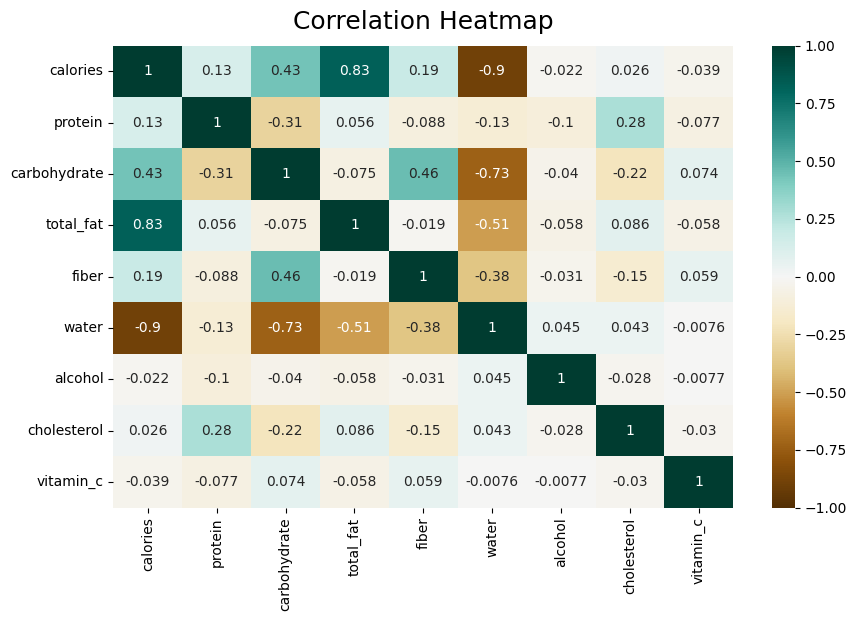

In [ ]:
df_num = df_food[['calories', 'protein', 'carbohydrate', 'total_fat', 'fiber', 'water', 'alcohol', 'cholesterol', 'vitamin_c']]

#Create correlation heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_num.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.show()

In [ ]:
# Create the scatter plot
fig = px.scatter(df_food, x='water', y='calories', hover_name='item')

# Set labels and title
fig.update_layout(xaxis_title='Water Content (gram)', yaxis_title='Calories (kcal)',
                  title='Relationship between Water Content and Calories',
                  title_x=0.5, height=600, width=800)

# Show the plot
fig.show()

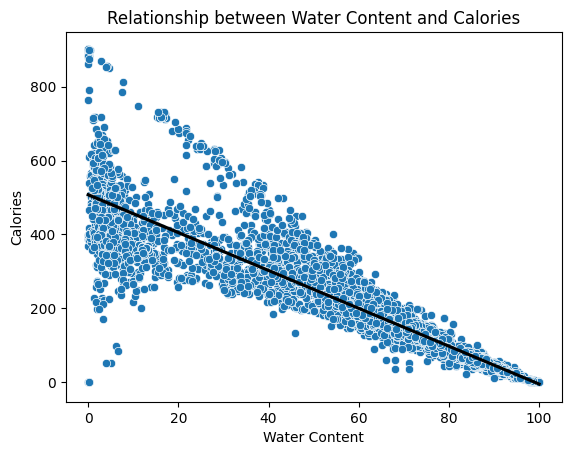

In [ ]:
# Create the scatter plot with a regression line
sns.scatterplot(x='water', y='calories', data=df_food)
sns.regplot(x='water', y='calories', data=df_food, scatter=False, color='black')

# Set labels and title
plt.xlabel('Water Content')
plt.ylabel('Calories')
plt.title('Relationship between Water Content and Calories')

# Show the plot
plt.show()

In [ ]:
# Create the scatter plot
fig = px.scatter(df_food, x='carbohydrate', y='calories', hover_name='item')

# Set labels and title
fig.update_layout(xaxis_title='Carbs Content (gram)', yaxis_title='Calories (kcal)',
                  title='Relationship between Carbohydrate Content and Calories', height=600, width=800)

# Show the plot
fig.show()


In [ ]:
# Create the scatter plot with a trendline
fig = px.scatter(df_food, x='protein', y='calories', hover_name='item')

# Set labels and title
fig.update_layout(xaxis_title='Protein Content (gram)', yaxis_title='Calories (kcal)',
                  title='Relationship between Protein Content and Calories', height=600, width=800)

# Show the plot
fig.show()


In [ ]:
# Create the scatter plot with a trendline
fig = px.scatter(df_food, x='total_fat', y='calories', hover_name='item')

# Set labels and title
fig.update_layout(xaxis_title='Fat Content (gram)', yaxis_title='Calories (kcal)',
                  title='Relationship between Fat Content and Calories', height=600, width=800)

# Show the plot
fig.show()

### 3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?

#### 3.a. Zero-carb-diet

In [ ]:
df_zero_carb = df_food[df_food['carbohydrate']==0]
df_non_zero_carb = df_food[df_food['carbohydrate']!=0]

df_3 = df_zero_carb.sort_values(by='cholesterol', ascending=False)
df_3

fdc_id                                               item  \
7606  174352  Veal, variety meats and by-products, brain, co...   
7690  174436  Lamb, New Zealand, imported, brains, cooked, s...   
4068  168265  Pork, fresh, variety meats and by-products, br...   
7604  174350  Lamb, variety meats and by-products, brain, co...   
4067  168264  Pork, fresh, variety meats and by-products, br...   
...      ...                                                ...   
7550  173845                               Game meat, bear, raw   
7613  174359    Lamb, variety meats and by-products, lungs, raw   
7617  174363  Veal, variety meats and by-products, pancreas,...   
7782  175294                             Game meat, beaver, raw   
7785  175297                         Game meat, boar, wild, raw   

                           category  calories  protein  carbohydrate  \
7606  Lamb, Veal, and Game Products     136.0    11.48           0.0   
7690  Lamb, Veal, and Game Products     154.0    14.03           0.0   
4068                  Pork Products     138.0    12.14           0.0   
7604  Lamb, Veal, and Game Products     273.0    16.97           0.0   
4067                  Pork Products     127.0    10.28           0.0   
...                             ...       ...      ...           ...   
7550  Lamb, Veal, and Game Products     161.0    20.10           0.0   
7613  Lamb, Veal, and Game Products      95.0    16.70           0.0   
7617  Lamb, Veal, and Game Products     256.0    29.10           0.0   
7782  Lamb, Veal, and Game Products     146.0    24.05           0.0   
7785  Lamb, Veal, and Game Products     122.0    21.51           0.0   

      total_fat  cholesterol  fiber  water  alcohol  vitamin_c  
7606       9.63       3100.0    0.0  76.89      NaN       13.0  
7690      10.92       2559.0    0.0  73.11      0.0        0.0  
4068       9.51       2552.0    0.0  75.88      NaN       14.0  
7604      22.19       2504.0    0.0  60.71      NaN       23.0  
4067       9.21       2195.0    0.0  78.36      NaN       13.5  
...         ...          ...    ...    ...      ...        ...  
7550       8.30          NaN    0.0  71.20      NaN        0.0  
7613       2.60          NaN    0.0  79.70      NaN       31.0  
7617      14.60          NaN    0.0  55.70      NaN        6.0  
7782       4.80          NaN    0.0  70.97      NaN        2.0  
7785       3.33          NaN    0.0  72.54      NaN        0.0  

[2138 rows x 12 columns]

In [ ]:
# Select data for each histogram
x1 = df_food['fiber']
x2 = df_zero_carb['fiber']
x3 = df_non_zero_carb['fiber']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Fiber Zero-Carb Food')
histogram2 = go.Histogram(x=x3, name='Fiber Non-Zero-Carb Food')
histogram3 = go.Histogram(x=x1, name='Fiber')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Fiber Histogram of Zero-Carb Food',
                                                    'Fiber Histogram of Non-Zero-Carb Food', 'Overall Fiber Histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles
fig.update_layout(title_text='Fiber Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()


In [ ]:
# Select data for each boxplot
y1 = df_food['fiber']
y2 = df_zero_carb['fiber']
y3 = df_non_zero_carb['fiber']


# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Fiber Zero-Carb Food')
box_plot2 = go.Box(y=y3, name='Fiber Non-Zero-Carb Food')
box_plot3 = go.Box(y=y1, name='Fiber')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Fiber of Zero-Carb Food',
                                                    'Fiber of Non-Zero-Carb Food', 'Overall Fiber'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Fiber')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()


In [ ]:
# Select data for each histogram
x1 = df_food['cholesterol']
x2 = df_zero_carb['cholesterol']
x3 = df_non_zero_carb['cholesterol']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Cholesterol Zero-Carb Food')
histogram2 = go.Histogram(x=x3, name='Cholesterol Non-Zero-Carb Food')
histogram3 = go.Histogram(x=x1, name='Cholesterol')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Cholesterol Histogram of Zero-Carb Food',
                                                    'Cholesterol Histogram of Non-Zero-Carb Food', 'Overall Cholesterol histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles (optional)
fig.update_layout(title_text='Cholesterol Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()

In [ ]:
# Select data for each boxplot
y1 = df_food['cholesterol']
y2 = df_zero_carb['cholesterol']
y3 = df_non_zero_carb['cholesterol']

# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Cholesterol Zero-Carb Food')
box_plot2 = go.Box(y=y3, name='Cholesterol Non-Zero-Carb Food')
box_plot3 = go.Box(y=y1, name='Cholesterol')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Cholesterol of Zero-Carb Food',
                                                    'Cholesterol of Non-Zero-Carb Food', 'Overall Cholesterol'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Cholesterol')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()


In [ ]:
# Select data for each histogram
x1 = df_food['water']
x2 = df_zero_carb['water']
x3 = df_non_zero_carb['water']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Water of Zero-Carb Food')
histogram2 = go.Histogram(x=x3, name='Water of Non-Zero-Carb Food')
histogram3 = go.Histogram(x=x1, name='Water')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Water Histogram of Zero-Carb Food',
                                                    'Water Histogram of Non-Zero-Carb Food', 'Overall Water histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles (optional)
fig.update_layout(title_text='Water Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()

In [ ]:
# Select data for each boxplot
y1 = df_food['water']
y2 = df_zero_carb['water']
y3 = df_non_zero_carb['water']

# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Water Zero-Carb Food')
box_plot2 = go.Box(y=y3, name='Water Non-Zero-Carb Food')
box_plot3 = go.Box(y=y1, name='Water')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Water of Zero-Carb Food',
                                                    'Water of Non-Zero-Carb Food', 'Overall Water'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Water')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()


In [ ]:
# Select data for each histogram
x1 = df_food['vitamin_c']
x2 = df_zero_carb['vitamin_c']
x3 = df_non_zero_carb['vitamin_c']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Vitamin C of Zero-Carb Food')
histogram2 = go.Histogram(x=x3, name='Vitamin C of Non-Zero-Carb Food')
histogram3 = go.Histogram(x=x1, name='Vitamin C')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Vitamin C Histogram of Zero-Carb Food',
                                                    'Vitamin C Histogram of Non-Zero-Carb Food', 'Overall Vitamin C histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles (optional)
fig.update_layout(title_text='Vitamin C Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()

In [ ]:
# Select data for each boxplot
y1 = df_food['vitamin_c']
y2 = df_zero_carb['vitamin_c']
y3 = df_non_zero_carb['vitamin_c']

# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Vitamin C Zero-Carb Food')
box_plot2 = go.Box(y=y3, name='Vitamin C Non-Zero-Carb Food')
box_plot3 = go.Box(y=y1, name='Vitamin C')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Vitamin C of Zero-Carb Food',
                                                    'Vitamin C of Non-Zero-Carb Food', 'Overall Vitamin C'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Vitamin C')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()

In [ ]:
y1 = df_food['vitamin_c']
y2 = df_zero_carb['vitamin_c']
y3 = df_non_zero_carb['vitamin_c']

np.mean(y2), np.mean(y3), np.mean(y1)

(0.709217046580773, 12.1147158449379, 8.97555919258047)

In [ ]:
y1 = df_food[df_food.vitamin_c.notnull()]['vitamin_c']
y2 = df_zero_carb[df_zero_carb.vitamin_c.notnull()]['vitamin_c']
y3 = df_non_zero_carb[df_non_zero_carb.vitamin_c.notnull()]['vitamin_c']


np.median(y2), np.median(y3), np.median(y1)

(0.0, 0.7, 0.0)

#### 3.b. Very high protein diet

In [ ]:
nutrition_info(df_food_1)

Data Type  Non-null Values  Null Values  \
fdc_id           int64             7793            0   
item            object             7793            0   
category        object             7793            0   
calories       float64             7793            0   
protein        float64             7793            0   
carbohydrate   float64             7793            0   
total_fat      float64             7793            0   
cholesterol    float64             7793            0   
fiber          float64             7793            0   
water          float64             7793            0   
alcohol        float64             7793            0   
vitamin_c      float64             7793            0   

              Percentage of Null Values  Unique Values Count  
fdc_id                              0.0                 7793  
item                                0.0                 7793  
category                            0.0                   25  
calories                            0.0                  667  
protein                             0.0                 2638  
carbohydrate                        0.0                 3135  
total_fat                           0.0                 2366  
cholesterol                         0.0                  312  
fiber                               0.0                  237  
water                               0.0                 4163  
alcohol                             0.0                   48  
vitamin_c                           0.0                  549

In [ ]:
df_food_1['total_mass']=df_food_1['protein']+df_food_1['carbohydrate']+df_food_1['total_fat']+df_food_1['cholesterol']/1000+df_food_1['fiber']+df_food_1['water']+df_food_1['alcohol']+df_food_1['vitamin_c']/1000
df_food_1['percent_protein']=df_food_1['protein']/df_food_1['total_mass']
df_food_1

fdc_id                                               item  \
0     167512  Pillsbury Golden Layer Buttermilk Biscuits, Ar...   
1     167513  Pillsbury, Cinnamon Rolls with Icing, refriger...   
2     167514  Kraft Foods, Shake N Bake Original Recipe, Coa...   
3     167515     George Weston Bakeries, Thomas English Muffins   
4     167516         Waffles, buttermilk, frozen, ready-to-heat   
...      ...                                                ...   
7788  175300         Game meat, buffalo, water, cooked, roasted   
7789  175301                                Game meat, elk, raw   
7790  175302                    Game meat, elk, cooked, roasted   
7791  175303                               Game meat, goat, raw   
7792  175304                   Game meat, goat, cooked, roasted   

                           category  calories  protein  carbohydrate  \
0                    Baked Products     307.0     5.88         41.18   
1                    Baked Products     330.0     4.34         53.42   
2                    Baked Products     377.0     6.10         79.80   
3                    Baked Products     232.0     8.00         46.00   
4                    Baked Products     273.0     6.58         41.05   
...                             ...       ...      ...           ...   
7788  Lamb, Veal, and Game Products     131.0    26.83          0.00   
7789  Lamb, Veal, and Game Products     111.0    22.95          0.00   
7790  Lamb, Veal, and Game Products     146.0    30.19          0.00   
7791  Lamb, Veal, and Game Products     109.0    20.60          0.00   
7792  Lamb, Veal, and Game Products     143.0    27.10          0.00   

      total_fat  cholesterol  fiber  water  alcohol  vitamin_c  total_mass  \
0         13.24          0.0    1.2  35.50      0.0        0.0     97.0000   
1         11.27          0.0    1.4  27.86      0.0        0.1     98.2901   
2          3.70          0.0    0.0   3.20      0.0        0.0     92.8000   
3          1.80          0.0    0.0  42.60      0.0        0.0     98.4000   
4          9.22         15.0    2.2  40.34      0.0        0.0     99.4050   
...         ...          ...    ...    ...      ...        ...         ...   
7788       1.80         61.0    0.0  68.81      0.0        0.0     97.5010   
7789       1.45         55.0    0.0  74.38      0.0        0.0     98.8350   
7790       1.90         73.0    0.0  66.28      0.0        0.0     98.4430   
7791       2.31         57.0    0.0  75.84      0.0        0.0     98.8070   
7792       3.03         75.0    0.0  68.21      0.0        0.0     98.4150   

      percent_protein  
0            0.060619  
1            0.044155  
2            0.065733  
3            0.081301  
4            0.066194  
...               ...  
7788         0.275177  
7789         0.232205  
7790         0.306675  
7791         0.208487  
7792         0.275365  

[7793 rows x 14 columns]

In [ ]:
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]

df_4 = df_high_protein.sort_values(by='percent_protein', ascending=False)
df_4

fdc_id                                               item  \
4646  174302                Soy protein isolate, potassium type   
4620  174276                                Soy protein isolate   
2968  170895     Egg, white, dried, stabilized, glucose reduced   
910   169599                  Gelatins, dry powder, unsweetened   
3138  173427  Egg, white, dried, powder, stabilized, glucose...   
3094  172204                                  Egg, white, dried   
1918  168020  Seal, bearded (Oogruk), meat, dried (Alaska Na...   
2259  173180               Beverages, Protein powder whey based   
1957  168059   Steelhead trout, dried, flesh (Shoshone Bannock)   
3137  173426  Egg, white, dried, flakes, stabilized, glucose...   
4864  174190              Fish, cod, Atlantic, dried and salted   
5347  168147                                 Vital wheat gluten   
1994  169795         Whale, beluga, meat, dried (Alaska Native)   
2246  173167         Beverages, ABBOTT, EAS whey protein powder   
2256  173177             Beverages, Whey protein powder isolate   
551   167961                          Snacks, pork skins, plain   
1950  168052             Fish, whitefish, dried (Alaska Native)   
4645  174301     Soy protein concentrate, produced by acid wash   
4482  172447  Soy protein concentrate, produced by alcohol e...   
2012  169813  Salmon, red (sockeye), filets with skin, smoke...   
1908  167650  Seal, bearded (Oogruk), meat, partially dried ...   
1952  168054          Fish, salmon, chum, dried (Alaska Native)   
1974  168990   Fish, herring eggs, Pacific, dry (Alaska Native)   
571   168851                Snacks, pork skins, barbecue-flavor   
1912  167654                       Smelt, dried (Alaska Native)   
1947  168049      Caribou, shoulder meat, dried (Alaska Native)   
1808  170495                          Seaweed, spirulina, dried   
3140  173429                             Egg substitute, powder   
984   169693  Gelatin desserts, dry mix, reduced calorie, wi...   
1879  167621                Walrus, meat, dried (Alaska Native)   
983   169692  Gelatin desserts, dry mix, reduced calorie, wi...   
2411  174181  Beverages, nutritional shake mix, high protein...   
2260  173181                Beverages, Protein powder soy based   
1902  167644     Caribou, rump meat, half dried (Alaska Native)   
4647  174303  Tofu, dried-frozen (koyadofu), prepared with c...   
5628  170560                       Seeds, sesame flour, low-fat   
5573  170146       Seeds, cottonseed flour, low fat (glandless)   
5574  170147  Seeds, cottonseed meal, partially defatted (gl...   
4480  172445                            Soy meal, defatted, raw   
3171  173460  Protein supplement, milk based, Muscle Milk Li...   

                                 category  calories  protein  carbohydrate  \
4646          Legumes and Legume Products     321.0    88.32          2.59   
4620          Legumes and Legume Products     335.0    88.32          0.00   
2968               Dairy and Egg Products     357.0    84.08          4.51   
910                                Sweets     335.0    85.60          0.00   
3138               Dairy and Egg Products     376.0    82.40          4.47   
3094               Dairy and Egg Products     382.0    81.10          7.80   
1918  American Indian/Alaska Native Foods     351.0    82.60          0.00   
2259                            Beverages     352.0    78.13          6.25   
1957  American Indian/Alaska Native Foods     382.0    77.27          0.00   
3137               Dairy and Egg Products     351.0    76.92          4.17   
4864       Finfish and Shellfish Products     290.0    62.82          0.00   
5347              Cereal Grains and Pasta     370.0    75.16         13.79   
1994  American Indian/Alaska Native Foods     327.0    69.86          0.00   
2246                            Beverages     385.0    66.67         17.95   
2256                            Beverages     359.0    58.14         29.07   
551       

In [ ]:
# Select data for each histogram
x1 = df_food['fiber']
x2 = df_food[df_food['item'].isin(df_high_protein['item'])]['fiber']
x3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['fiber']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Fiber High Protein Food')
histogram2 = go.Histogram(x=x3, name='Fiber Non-High Protein Food')
histogram3 = go.Histogram(x=x1, name='Fiber')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Fiber Histogram of High Protein Food',
                                                    'Fiber Histogram of Non-High Protein Food', 'Overall Fiber Histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles
fig.update_layout(title_text='Fiber Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()


In [ ]:
# Select data for each boxplot
y1 = df_food['fiber']
y2 = df_food[df_food['item'].isin(df_high_protein['item'])]['fiber']
y3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['fiber']


# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Fiber High Protein Food')
box_plot2 = go.Box(y=y3, name='Fiber Non-High Protein Food')
box_plot3 = go.Box(y=y1, name='Fiber')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Fiber of High Protein Food',
                                                    'Fiber of Non-High Protein Food', 'Overall Fiber'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Fiber')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()


In [ ]:
# Select data for each histogram
x1 = df_food['cholesterol']
x2 = df_food[df_food['item'].isin(df_high_protein['item'])]['cholesterol']
x3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['cholesterol']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Cholesterol High Protein Food')
histogram2 = go.Histogram(x=x3, name='Cholesterol Non-High Protein Food')
histogram3 = go.Histogram(x=x1, name='Cholesterol')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Cholesterol Histogram of High Protein Food',
                                                    'Cholesterol Histogram of Non-High Protein Food', 'Overall Cholesterol Histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles
fig.update_layout(title_text='Cholesterol Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()


In [ ]:
# Select data for each boxplot
y1 = df_food['cholesterol']
y2 = df_food[df_food['item'].isin(df_high_protein['item'])]['cholesterol']
y3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['cholesterol']


# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Cholesterol High Protein Food')
box_plot2 = go.Box(y=y3, name='Cholesterol Non-High Protein Food')
box_plot3 = go.Box(y=y1, name='Cholesterol')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Cholesterol of High Protein',
                                                    'Cholesterol of Non-High Protein', 'Overall Cholesterol'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Cholesterol')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()


In [ ]:
y1 = df_food[df_food.cholesterol.notnull()]['cholesterol']
cond2 = df_food['item'].isin(df_high_protein['item'])
y2 = df_food.loc[cond2 & df_food['cholesterol'].notnull(), 'cholesterol']
cond3 = df_food['item'].isin(df_non_high_protein['item'])
y3 = df_food.loc[cond3 & df_food['cholesterol'].notnull(), 'cholesterol']

np.mean(y2), np.mean(y3), np.mean(y1)

(75.41666666666667, 44.8967110627888, 45.04530700568028)

In [ ]:
# Select data for each histogram
x1 = df_food['vitamin_c']
x2 = df_food[df_food['item'].isin(df_high_protein['item'])]['vitamin_c']
x3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['vitamin_c']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Vitamin C High Protein Food')
histogram2 = go.Histogram(x=x3, name='Vitamin C Non-High Protein Food')
histogram3 = go.Histogram(x=x1, name='Vitamin C')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Vitamin C Histogram of High Protein Food',
                                                    'Vitamin C Histogram of Non-High Protein Food', 'Overall Vitamin C Histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles
fig.update_layout(title_text='Vitamin C Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()


In [ ]:
# Select data for each boxplot
y1 = df_food['vitamin_c']
y2 = df_food[df_food['item'].isin(df_high_protein['item'])]['vitamin_c']
y3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['vitamin_c']


# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Vitamin C High Protein Food')
box_plot2 = go.Box(y=y3, name='Vitamin C Non-High Protein Food')
box_plot3 = go.Box(y=y1, name='Vitamin C')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Vitamin C of High Protein',
                                                    'Vitamin C of Non-High Protein', 'Overall Vitamin C'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Vitamin C')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()


In [ ]:
# Select data for each histogram
x1 = df_food['carbohydrate']
x2 = df_food[df_food['item'].isin(df_high_protein['item'])]['carbohydrate']
x3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['carbohydrate']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Carbohydrate High Protein Food')
histogram2 = go.Histogram(x=x3, name='Carbohydrate Non-High Protein Food')
histogram3 = go.Histogram(x=x1, name='Carbohydrate')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Carbohydrate Histogram of High Protein Food',
                                                    'Carbohydrate Histogram of Non-High Protein Food', 'Overall Carbohydrate Histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles
fig.update_layout(title_text='Carbohydrate Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()


In [ ]:
# Select data for each boxplot
y1 = df_food['carbohydrate']
y2 = df_food[df_food['item'].isin(df_high_protein['item'])]['carbohydrate']
y3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['carbohydrate']


# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Carbohydrate High Protein Food')
box_plot2 = go.Box(y=y3, name='Carbohydrate Non-High Protein Food')
box_plot3 = go.Box(y=y1, name='Carbohydrate')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Carbohydrate of High Protein',
                                                    'Carbohydrate of Non-High Protein', 'Overall Carbohydrate'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Carbohydrate')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()


In [ ]:
# Select data for each histogram
x1 = df_food['total_fat']
x2 = df_food[df_food['item'].isin(df_high_protein['item'])]['total_fat']
x3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['total_fat']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Fat High Protein Food')
histogram2 = go.Histogram(x=x3, name='Fat Non-High Protein Food')
histogram3 = go.Histogram(x=x1, name='Fat')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Fat Histogram of High Protein Food',
                                                    'Fat Histogram of Non-High Protein Food', 'Overall Fat Histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles
fig.update_layout(title_text='Fat Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()

In [ ]:
# Select data for each boxplot
y1 = df_food['total_fat']
y2 = df_food[df_food['item'].isin(df_high_protein['item'])]['total_fat']
y3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['total_fat']


# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Fat High Protein Food')
box_plot2 = go.Box(y=y3, name='Fat Non-High Protein Food')
box_plot3 = go.Box(y=y1, name='Fat')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Fat of High Protein',
                                                    'Fat of Non-High Protein', 'Overall Fat'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Fat')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()


In [ ]:
# Select data for each histogram
x1 = df_food['water']
x2 = df_food[df_food['item'].isin(df_high_protein['item'])]['water']
x3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['water']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Water High Protein Food')
histogram2 = go.Histogram(x=x3, name='Water Non-High Protein Food')
histogram3 = go.Histogram(x=x1, name='Water')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Water Histogram of High Protein Food',
                                                    'Water Histogram of Non-High Protein Food', 'Overall Water Histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles
fig.update_layout(title_text='Water Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()


In [ ]:
# Select data for each boxplot
y1 = df_food['water']
y2 = df_food[df_food['item'].isin(df_high_protein['item'])]['water']
y3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['water']


# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Water High Protein Food')
box_plot2 = go.Box(y=y3, name='Water Non-High Protein Food')
box_plot3 = go.Box(y=y1, name='Water')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Water of High Protein',
                                                    'Water of Non-High Protein', 'Overall Water'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Water')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()


In [ ]:
# Select data for each histogram
x1 = df_food['calories']
x2 = df_food[df_food['item'].isin(df_high_protein['item'])]['calories']
x3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['calories']

# Create histograms using go.Histogram and add to subplots
histogram1 = go.Histogram(x=x2, name='Calories High Protein Food')
histogram2 = go.Histogram(x=x3, name='Calories Non-High Protein Food')
histogram3 = go.Histogram(x=x1, name='Calories')

# Create a subplot with 3 rows and 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=('Calories Histogram of High Protein Food',
                                                    'Calories Histogram of Non-High Protein Food', 'Overall Calories Histogram'))


fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)
fig.add_trace(histogram3, row=3, col=1)

# Update layout with subplot titles
fig.update_layout(title_text='Calories Histograms',
                  height=1000, width=800)

# Show the plot
fig.show()


In [ ]:
# Select data for each boxplot
y1 = df_food['calories']
y2 = df_food[df_food['item'].isin(df_high_protein['item'])]['calories']
y3 = df_food[df_food['item'].isin(df_non_high_protein['item'])]['calories']


# Create three box plot traces
box_plot1 = go.Box(y=y2, name='Calories High Protein Food')
box_plot2 = go.Box(y=y3, name='Calories Non-High Protein Food')
box_plot3 = go.Box(y=y1, name='Calories')

# Create a figure with subplots (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=('Calories of High Protein',
                                                    'Calories of Non-High Protein', 'Overall Calories'))

# Add box plots to subplots
fig.add_trace(box_plot1, row=1, col=1)
fig.add_trace(box_plot2, row=1, col=2)
fig.add_trace(box_plot3, row=1, col=3)

# Update layout with title and axis labels
fig.update_layout(title='Boxplot of Calories')

# Set y-axis range manually for consistency
fig.update_yaxes(range=[min(y1.min(), y2.min(), y3.min()), max(y1.max(), y2.max(), y3.max())])

# Show the plot
fig.show()


In [ ]:
y1 = df_food[df_food['vitamin_c'].notnull()]['vitamin_c']
cond2 = df_food['item'].isin(df_high_protein['item'])
y2 = df_food.loc[cond2 & df_food['vitamin_c'].notnull(), 'vitamin_c']
cond3 = df_food['item'].isin(df_non_high_protein['item'])
y3 = df_food.loc[cond3 & df_food['vitamin_c'].notnull(), 'vitamin_c']

np.mean(y2), np.mean(y3), np.mean(y1)

(18.46388888888889, 8.928741776315789, 8.97555919258047)

In [ ]:
df_5 = df_food_1.sort_values(by='protein', ascending=False)
df_5.head(15)

fdc_id                                               item  \
4646  174302                Soy protein isolate, potassium type   
4620  174276                                Soy protein isolate   
910   169599                  Gelatins, dry powder, unsweetened   
2968  170895     Egg, white, dried, stabilized, glucose reduced   
1918  168020  Seal, bearded (Oogruk), meat, dried (Alaska Na...   
3138  173427  Egg, white, dried, powder, stabilized, glucose...   
3094  172204                                  Egg, white, dried   
2259  173180               Beverages, Protein powder whey based   
1957  168059   Steelhead trout, dried, flesh (Shoshone Bannock)   
3137  173426  Egg, white, dried, flakes, stabilized, glucose...   
5347  168147                                 Vital wheat gluten   
1994  169795         Whale, beluga, meat, dried (Alaska Native)   
2246  173167         Beverages, ABBOTT, EAS whey protein powder   
4645  174301     Soy protein concentrate, produced by acid wash   
4482  172447  Soy protein concentrate, produced by alcohol e...   

                                 category  calories  protein  carbohydrate  \
4646          Legumes and Legume Products     321.0    88.32          2.59   
4620          Legumes and Legume Products     335.0    88.32          0.00   
910                                Sweets     335.0    85.60          0.00   
2968               Dairy and Egg Products     357.0    84.08          4.51   
1918  American Indian/Alaska Native Foods     351.0    82.60          0.00   
3138               Dairy and Egg Products     376.0    82.40          4.47   
3094               Dairy and Egg Products     382.0    81.10          7.80   
2259                            Beverages     352.0    78.13          6.25   
1957  American Indian/Alaska Native Foods     382.0    77.27          0.00   
3137               Dairy and Egg Products     351.0    76.92          4.17   
5347              Cereal Grains and Pasta     370.0    75.16         13.79   
1994  American Indian/Alaska Native Foods     327.0    69.86          0.00   
2246                            Beverages     385.0    66.67         17.95   
4645          Legumes and Legume Products     328.0    63.63         25.41   
4482          Legumes and Legume Products     328.0    63.63         25.41   

      total_fat  cholesterol  fiber  water  alcohol  vitamin_c  total_mass  \
4646       0.53          0.0    0.0   4.98      0.0        0.0     96.4200   
4620       3.39          0.0    0.0   4.98      0.0        0.0     96.6900   
910        0.10          0.0    0.0  13.00      0.0        0.0     98.7000   
2968       0.32          0.0    0.0   5.48      0.0        0.0     94.3900   
1918       2.30          0.0    0.0  11.60      0.0        0.0     96.5000   
3138       0.04          0.0    0.0   8.54      0.0        0.0     95.4500   
3094       0.00          0.0    0.0   5.80      0.0        0.0     94.7000   
2259       1.56         16.0    3.1   3.44      0.0        0.0     92.4960   
1957       8.06        227.0    0.0   6.49      0.0        0.0     92.0470   
3137       0.04          0.0    0.0  14.62      0.0        0.0     95.7500   
5347       1.85          0.0    0.6   8.20      0.0        0.0     99.6000   
1994       5.34        122.0    0.0  22.39      0.0        0.0     97.7120   
2246       5.13        205.0    0.0   6.61      0.0        0.8     96.5658   
4645       0.46          0.0    5.5   5.80      0.0        0.0    100.8000   
4482       0.46          0.0    5.5   5.80      0.0        0.0    100.8000   

      percent_protein  
4646         0.915993  
4620         0.913435  
910          0.867275  
2968         0.890772  
1918         0.855959  
3138         0.863279  
3094         0.856389  
2259         0.844685  
1957         0.839462  
3137         0.803342  
5347         0.754618  
1994         0.714958  
2246         0.690410  
4645         0.631250  
4482         0.631250

### 4. According to the Cleveland Clinic website, a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.

#### Fit a linear model of calories estimation based on carbohydrate, protein, and total fat. Compare the coefficient with widely accepted caloric values of carbohydrates, protein, and fat (4-4-9).

In [ ]:
# Define features and target
X = df_food[['total_fat']]
y = df_food['calories']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Use statsmodels for a more detailed summary
X_with_intercept = sm.add_constant(X)  # Add an intercept term to the features
model_sm = sm.OLS(y, X_with_intercept).fit()

# Print the summary
model_sm.summary()

Coefficients: [8.50396952]
Intercept: 129.35812515765107


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 1.667e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:29:27   Log-Likelihood:                -46565.
No. Observations:                7793   AIC:                         9.313e+04
Df Residuals:                    7791   BIC:                         9.315e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.3581      1.288    100.415      0.000     126.833     131.883
total_fat      8.5040      0.066    129.113      0.000       8.375       8.633
==============================================================================
Omnibus:                     1065.616   Durbin-Watson:                   0.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1565.895
Skew:                           1.094   Prob(JB):                         0.00
Kurtosis:                       3.198   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Create the scatter plot with a trendline
fig = px.scatter(df_food, x='total_fat', y='calories',
                 trendline='ols', trendline_color_override='black', hover_name='item')

# Set labels and title
fig.update_layout(xaxis_title='Fat Content (gram)', yaxis_title='Calories (kcal)',
                  title='Relationship between Fat Content and Calories', height=600, width=800)



# Show the plot
fig.show()

In [ ]:
# Define features and target
X = df_food[['carbohydrate', 'protein', 'total_fat']]
y = df_food['calories']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Use statsmodels for a more detailed summary
X_with_intercept = sm.add_constant(X)  # Add an intercept term to the features
model_sm = sm.OLS(y, X_with_intercept).fit()

# Print the summary
model_sm.summary()

Coefficients: [3.79862627 4.00204437 8.80413501]
Intercept: 4.079962044694696


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.508e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:29:44   Log-Likelihood:                -33174.
No. Observations:                7793   AIC:                         6.636e+04
Df Residuals:                    7789   BIC:                         6.638e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0800      0.386     10.559      0.000       3.323       4.837
carbohydrate     3.7986      0.008    478.946      0.000       3.783       3.814
protein          4.0020      0.019    213.450      0.000       3.965       4.039
total_fat        8.8041      0.012    742.618      0.000       8.781       8.827
==============================================================================
Omnibus:                     4794.597   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3898149.105
Skew:                           1.536   Prob(JB):                         0.00
Kurtosis:                     112.525   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_food['est_fat_cal'] = df_food['total_fat'] * 8.8041
df_food['est_prot_cal'] = df_food['protein'] * 4.0020
df_food['est_carb_cal'] = df_food['carbohydrate'] * 3.7986
df_food['predicted_cal'] = df_food['est_fat_cal'] + df_food['est_prot_cal'] + df_food['est_carb_cal']
df_food

fdc_id                                               item  \
0     167512  Pillsbury Golden Layer Buttermilk Biscuits, Ar...   
1     167513  Pillsbury, Cinnamon Rolls with Icing, refriger...   
2     167514  Kraft Foods, Shake N Bake Original Recipe, Coa...   
3     167515     George Weston Bakeries, Thomas English Muffins   
4     167516         Waffles, buttermilk, frozen, ready-to-heat   
...      ...                                                ...   
7788  175300         Game meat, buffalo, water, cooked, roasted   
7789  175301                                Game meat, elk, raw   
7790  175302                    Game meat, elk, cooked, roasted   
7791  175303                               Game meat, goat, raw   
7792  175304                   Game meat, goat, cooked, roasted   

                           category  calories  protein  carbohydrate  \
0                    Baked Products     307.0     5.88         41.18   
1                    Baked Products     330.0     4.34         53.42   
2                    Baked Products     377.0     6.10         79.80   
3                    Baked Products     232.0     8.00         46.00   
4                    Baked Products     273.0     6.58         41.05   
...                             ...       ...      ...           ...   
7788  Lamb, Veal, and Game Products     131.0    26.83          0.00   
7789  Lamb, Veal, and Game Products     111.0    22.95          0.00   
7790  Lamb, Veal, and Game Products     146.0    30.19          0.00   
7791  Lamb, Veal, and Game Products     109.0    20.60          0.00   
7792  Lamb, Veal, and Game Products     143.0    27.10          0.00   

      total_fat  cholesterol  fiber  water  alcohol  vitamin_c  est_fat_cal  \
0         13.24          0.0    1.2  35.50      NaN        NaN   116.566284   
1         11.27          0.0    1.4  27.86      NaN        0.1    99.222207   
2          3.70          NaN    NaN   3.20      NaN        NaN    32.575170   
3          1.80          NaN    NaN  42.60      NaN        NaN    15.847380   
4          9.22         15.0    2.2  40.34      0.0        0.0    81.173802   
...         ...          ...    ...    ...      ...        ...          ...   
7788       1.80         61.0    0.0  68.81      NaN        0.0    15.847380   
7789       1.45         55.0    0.0  74.38      NaN        0.0    12.765945   
7790       1.90         73.0    0.0  66.28      NaN        0.0    16.727790   
7791       2.31         57.0    0.0  75.84      NaN        0.0    20.337471   
7792       3.03         75.0    0.0  68.21      0.0        0.0    26.676423   

      est_prot_cal  est_carb_cal  predicted_cal  
0         23.53176    156.426348     296.524392  
1         17.36868    202.921212     319.512099  
2         24.41220    303.128280     360.115650  
3         32.01600    174.735600     222.598980  
4         26.33316    155.932530     263.439492  
...            ...           ...            ...  
7788     107.37366      0.000000     123.221040  
7789      91.84590      0.000000     104.611845  
7790     120.82038      0.000000     137.548170  
7791      82.44120      0.000000     102.778671  
7792     108.45420      0.000000     135.130623  

[7793 rows x 16 columns]

In [ ]:
# Create the scatter plot with a trendline
fig = px.scatter(df_food, x='predicted_cal', y='calories', trendline='ols', trendline_color_override='black', hover_name='item')

# Set labels and title
fig.update_layout(xaxis_title='Predicted Calories (kcal)', yaxis_title='Calories (kcal)',
                  title='Predicted Calories vs Actual Calories', height=600, width=800)

# Show the plot
fig.show()

# Get OLS regression results
results = px.get_trendline_results(fig)

# Access and print the summary of OLS regression
results.iloc[0].px_fit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.526e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:29:53   Log-Likelihood:                -33174.
No. Observations:                7793   AIC:                         6.635e+04
Df Residuals:                    7791   BIC:                         6.637e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0803      0.315     12.933      0.000       3.462       4.699
x1             1.0000      0.001    867.509      0.000       0.998       1.002
==============================================================================
Omnibus:                     4794.595   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3898104.337
Skew:                           1.536   Prob(JB):                         0.00
Kurtosis:                     112.524   Cond. No.                         446.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

**5.1. Analyze the model errors of calories estimation based on carbohydrate, protein, and total fat**

In [ ]:
# Define features and target
X1 = df_food[['carbohydrate', 'protein', 'total_fat']]
y1 = df_food['calories']

# Fit the model
model = LinearRegression()
model.fit(X1, y1)

# Get coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [3.79862627 4.00204437 8.80413501]
Intercept: 4.079962044694696


In [ ]:
# Define features and target
X = df_food[['carbohydrate', 'protein', 'total_fat']]
y = df_food['calories']


# Use statsmodels for a more detailed summary
X_with_intercept = sm.add_constant(X)  # Add an intercept term to the features
model_sm = sm.OLS(y, X_with_intercept).fit()

# Get predicted values
y_pred = model_sm.predict(X_with_intercept)  # Use X1_with_intercept

# Calculate the squared errors
squared_errors = (y - y_pred) ** 2

# Calculate the mean squared error
mse = np.mean(squared_errors)

# Print the MSE
print(f"MSE: {mse}")

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the RMSE
print(f"RMSE: {rmse}")

# Get R-squared value
r_squared = model_sm.rsquared

# Print the R-squared value
print(f"R-squared: {r_squared}")

# Print the summary
model_sm.summary()

MSE: 291.7522292268119
RMSE: 17.080756108170736
R-squared: 0.9897535862208672


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.508e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:30:08   Log-Likelihood:                -33174.
No. Observations:                7793   AIC:                         6.636e+04
Df Residuals:                    7789   BIC:                         6.638e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0800      0.386     10.559      0.000       3.323       4.837
carbohydrate     3.7986      0.008    478.946      0.000       3.783       3.814
protein          4.0020      0.019    213.450      0.000       3.965       4.039
total_fat        8.8041      0.012    742.618      0.000       8.781       8.827
==============================================================================
Omnibus:                     4794.597   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3898149.105
Skew:                           1.536   Prob(JB):                         0.00
Kurtosis:                     112.525   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculate residuals (difference between predicted and actual calories)
# Get predicted values
df_food['predicted_cal_new'] = model_sm.predict(X_with_intercept)  # Use X1_with_intercept
df_food['residuals'] = df_food['calories'] - df_food['predicted_cal_new']

# Analyze residuals to identify hidden sources of calories
# Check for patterns, outliers, or specific categories with positive errors
df_food_2 = df_food[df_food['alcohol']>0]
df_food_2[['item', 'category', 'alcohol', 'residuals']].sort_values(by='residuals', ascending=False)

item   category  alcohol  \
2334  Alcoholic beverage, distilled, all (gin, rum, ...  Beverages     42.5   
2333  Alcoholic beverage, distilled, all (gin, rum, ...  Beverages     39.7   
2213  Alcoholic beverage, distilled, all (gin, rum, ...  Beverages     37.9   
2212  Alcoholic beverage, distilled, all (gin, rum, ...  Beverages     36.0   
2422   Alcoholic beverage, distilled, whiskey, 86 proof  Beverages     36.0   
...                                                 ...        ...      ...   
2161          Alcoholic beverage, beer, light, low carb  Beverages      3.3   
2158         Alcoholic beverage, beer, light, BUD LIGHT  Beverages      3.3   
2150                    Alcoholic beverage, beer, light  Beverages      3.1   
813                        Puddings, rice, ready-to-eat     Sweets      0.3   
2466         Malt beverage, includes non-alcoholic beer  Beverages      0.3   

       residuals  
2334  290.920038  
2333  270.920038  
2213  258.920038  
2212  245.540175  
2422  245.540175  
...          ...  
2161   19.466693  
2158   18.981313  
2150   17.729800  
813     2.207807  
2466    0.444171  

[73 rows x 4 columns]

In [ ]:
# Check for patterns, outliers, or specific categories with negative errors
df_food_3 = df_food[df_food['fiber']>0]
df_food_3[['item', 'category', 'fiber', 'residuals']].sort_values(by='residuals', ascending=True)

item  \
904                      Cocoa, dry powder, unsweetened   
905   Cocoa, dry powder, unsweetened, processed with...   
908   Gelatin desserts, dry mix, reduced calorie, wi...   
5501                                   Corn bran, crude   
4409  Cereals ready-to-eat, SUN COUNTRY, KRETSCHMER ...   
...                                                 ...   
2151            Alcoholic beverage, pina colada, canned   
2413           Alcoholic beverage, whiskey sour, canned   
2153  Alcoholic beverage, pina colada, prepared-from...   
7065                 Seasoning mix, dry, taco, original   
2160  Alcoholic beverage, daiquiri, prepared-from-re...   

                     category  fiber   residuals  
904                    Sweets   37.0 -195.077142  
905                    Sweets   29.8 -193.311045  
908                    Sweets    0.1 -173.479811  
5501  Cereal Grains and Pasta   79.0 -146.951211  
4409        Breakfast Cereals   41.3 -145.841447  
...                       ...    ...         ...  
2151                Beverages    0.1   58.765300  
2413                Beverages    0.1   64.018446  
2153                Beverages    0.3   65.610534  
7065         Spices and Herbs   13.3   79.590515  
2160                Beverages    0.1  154.789201  

[3858 rows x 4 columns]

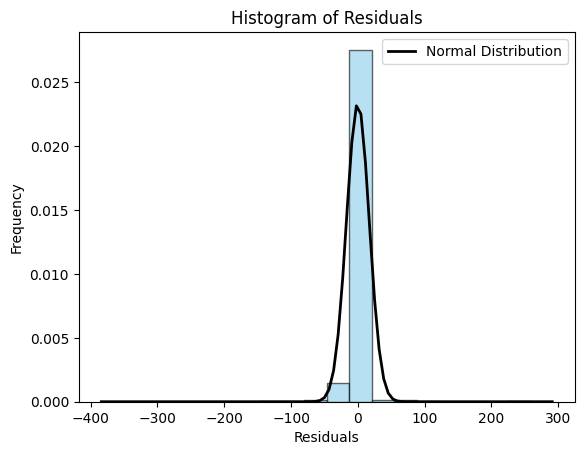

In [ ]:
# Plot histogram of residuals
plt.hist(df_food['residuals'], bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Generate normal distribution curve with mean and standard deviation of residuals
mu, sigma = np.mean(df_food['residuals']), np.std(df_food['residuals'])
x = np.linspace(min(df_food['residuals']), max(df_food['residuals']), 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'k-', linewidth=2, label='Normal Distribution')

plt.legend()
plt.show()


Here is the summary of the previous model error analysis.

| Metric | Value | Explanation |
| :--------------------: | :---: | :---------- |
| Adjusted R-Squared   | 0.99 | It is a modified version of R-squared that has been adjusted for the number of input features in the model. The higher the adjusted R-squared, the better the model fits the data. It is less affected by outliers.|
| MSE                  | 291.75   | It measures the average squared difference between predicted and actual values, quantifying the model’s prediction error. The lower the MSE, the better the model fits the data. It is sensitive to outliers.|
| RMSE                 | 17.08   | It is the square root of MSE and it has the same unit of measurement as the output variable. The lower the RMSE, the better the model fits the data. It is sensitive to outliers.|
| Residual Plot        | Shown below   |  A residual plot is a scatter plot of residuals against predicted values / fitted values. It is used to detect non-linearity, unequal error variances, and outliers. A good model should have a residual plot that shows no pattern or trend, and the residuals should be randomly distributed around zero.|

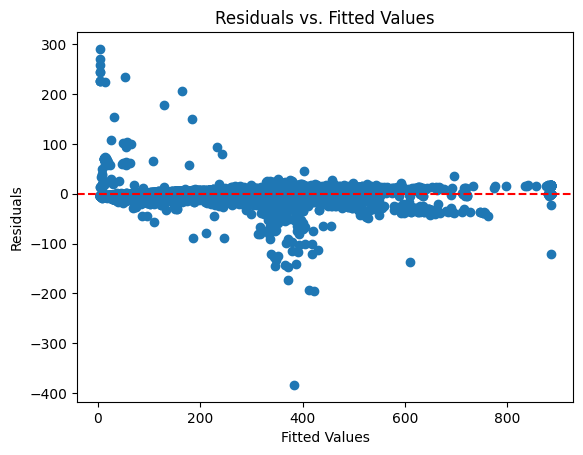

In [ ]:
# Residuals vs. fitted values plot
plt.scatter(df_food['predicted_cal_new'], df_food['residuals'])
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

**5.2. Compare 3 models to identify nutrients that impact calorie estimation**

These are 3 models that will be compared to identify nutrients that significantly impact calorie estimation.

- Model 1 : Calories estimation based on carbohydrate, protein, and total fat.
- Model 2 : Calories estimation based on carbohydrate, protein, total fat, alcohol, and fiber.
- Model 3 : Calories estimation utilizing all nutrients in the dataset, excluding water.

In [ ]:
# Define features and target
X = df_food[['carbohydrate', 'protein', 'total_fat']]
y = df_food['calories']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Use statsmodels for a more detailed summary
X_with_intercept = sm.add_constant(X)  # Add an intercept term to the features
model_sm = sm.OLS(y, X_with_intercept).fit()

# Get predicted values
y_pred = model_sm.predict(X_with_intercept)  # Use X1_with_intercept

# Calculate the squared errors
squared_errors = (y - y_pred) ** 2

# Calculate the mean squared error
mse = np.mean(squared_errors)

# Print the MSE
print(f"MSE: {mse}")

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the RMSE
print(f"RMSE: {rmse}")

# Get R-squared value
r_squared = model_sm.rsquared

# Print the R-squared value
print(f"R-squared: {r_squared}")

# Print the summary
model_sm.summary()

Coefficients: [3.79862627 4.00204437 8.80413501]
Intercept: 4.079962044694696
MSE: 291.7522292268119
RMSE: 17.080756108170736
R-squared: 0.9897535862208672


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.508e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:30:37   Log-Likelihood:                -33174.
No. Observations:                7793   AIC:                         6.636e+04
Df Residuals:                    7789   BIC:                         6.638e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0800      0.386     10.559      0.000       3.323       4.837
carbohydrate     3.7986      0.008    478.946      0.000       3.783       3.814
protein          4.0020      0.019    213.450      0.000       3.965       4.039
total_fat        8.8041      0.012    742.618      0.000       8.781       8.827
==============================================================================
Omnibus:                     4794.597   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3898149.105
Skew:                           1.536   Prob(JB):                         0.00
Kurtosis:                     112.525   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Define features and target
X1 = df_food_1[['carbohydrate', 'protein', 'total_fat', 'alcohol', 'fiber']]
y1 = df_food_1['calories']


# Fit the model
model = LinearRegression()
model.fit(X1, y1)

# Get coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Use statsmodels for a more detailed summary
X1_with_intercept = sm.add_constant(X1)  # Add an intercept term to the features
model_sm = sm.OLS(y1, X1_with_intercept).fit()

# Get predicted values
y_pred = model_sm.predict(X1_with_intercept)  # Use X1_with_intercept

# Calculate the squared errors
squared_errors = (y1 - y_pred) ** 2

# Calculate the mean squared error
mse = np.mean(squared_errors)

# Print the MSE
print(f"MSE: {mse}")

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the RMSE
print(f"RMSE: {rmse}")

# Get R-squared value
r_squared = model_sm.rsquared

# Print the R-squared value
print(f"R-squared: {r_squared}")

# Print the summary
model_sm.summary()

Coefficients: [ 3.95947455  4.15190673  8.84495324  6.85996027 -1.71403848]
Intercept: 0.9803421137510497
MSE: 123.41658751486192
RMSE: 11.1093018464196
R-squared: 0.9956655775133676


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.578e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:30:43   Log-Likelihood:                -29822.
No. Observations:                7793   AIC:                         5.966e+04
Df Residuals:                    7787   BIC:                         5.970e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9803      0.254      3.862      0.000       0.483       1.478
carbohydrate     3.9595      0.006    688.203      0.000       3.948       3.971
protein          4.1519      0.012    338.026      0.000       4.128       4.176
total_fat        8.8450      0.008   1145.382      0.000       8.830       8.860
alcohol          6.8600      0.077     88.942      0.000       6.709       7.011
fiber           -1.7140      0.034    -50.994      0.000      -1.780      -1.648
==============================================================================
Omnibus:                    11922.313   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20528561.781
Skew:                          -9.028   Prob(JB):                         0.00
Kurtosis:                     253.790   Cond. No.                         68.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Define features and target

X1 = df_food_1[['carbohydrate', 'protein', 'total_fat', 'alcohol', 'fiber', 'cholesterol', 'vitamin_c']]
y1 = df_food_1['calories']

# Fit the model
model = LinearRegression()
model.fit(X1, y1)

# Get coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Use statsmodels for a more detailed summary
X1_with_intercept = sm.add_constant(X1)  # Add an intercept term to the features
model_sm = sm.OLS(y1, X1_with_intercept).fit()

# Get predicted values
y_pred = model_sm.predict(X1_with_intercept)  # Use X1_with_intercept

# Calculate the squared errors
squared_errors = (y1 - y_pred) ** 2

# Calculate the mean squared error
mse = np.mean(squared_errors)

# Print the MSE
print(f"MSE: {mse}")

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the RMSE
print(f"RMSE: {rmse}")

# Get R-squared value
r_squared = model_sm.rsquared

# Print the R-squared value
print(f"R-squared: {r_squared}")

# Print the summary
model_sm.summary()

Coefficients: [ 3.96439711e+00  4.12721564e+00  8.83701517e+00  6.84907884e+00
 -1.68657423e+00  5.66980017e-03 -2.54788027e-02]
Intercept: 1.1871242163277884
MSE: 120.18950329437588
RMSE: 10.963097340367634
R-squared: 0.9957789135461746


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.624e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:30:49   Log-Likelihood:                -29718.
No. Observations:                7793   AIC:                         5.945e+04
Df Residuals:                    7785   BIC:                         5.951e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1871      0.252      4.702      0.000       0.692       1.682
carbohydrate     3.9644      0.006    694.871      0.000       3.953       3.976
protein          4.1272      0.012    330.682      0.000       4.103       4.152
total_fat        8.8370      0.008   1155.440      0.000       8.822       8.852
alcohol          6.8491      0.076     89.960      0.000       6.700       6.998
fiber           -1.6866      0.033    -50.682      0.000      -1.752      -1.621
cholesterol      0.0057      0.001      5.328      0.000       0.004       0.008
vitamin_c       -0.0255      0.002    -13.458      0.000      -0.029      -0.022
==============================================================================
Omnibus:                    11897.958   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22126482.600
Skew:                          -8.955   Prob(JB):                         0.00
Kurtosis:                     263.426   Cond. No.                         266.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To gain a better understanding and identify other nutrients that significantly impact calorie estimation, three models are compared. The summary of error analysis of these models is as follows.

| Metric | Model 1 | Model 2 | Model 3 |
| :----: | :-----: | :-----: | :-----: |
| Input Features | Carbohydrate, Protein, Total Fat | Carbohydrate, Protein, Total Fat, Alcohol, Fiber	| Carbohydrate, Protein, Total Fat, Alcohol, Fiber, Cholesterol, Vitamin C |
| Adjusted R-Squared | 0.9898 | 0.9957 | 0.9957 |
| MSE | 291.75 | 123 | 120 |
| RMSE | 17 | 11 | 10.96 |

- Model 2 and 3 have the highest adjusted R-squared values, indicating better fit to dataset compared to Model 1.
- Comparing Model 1 and Model 2 highlights that including alcohol and fiber as predictors improve model performance, as shown by lower MSE and RMSE. It suggests that these additional features have significant contribution in predicting calorie values.
- However, the comparison between Model 2 and Model 3 suggests that including cholesterol and vitamin C as predictors does not significantly improve model performance, as indicated by insignificant difference in MSE and RMSE between the models.
- To reduce overfitting and identify significant predictors for calorie estimation, Lasso regression was performed. With α = 0.01, the resulting Lasso score of 0.99577 indicates a strong fit to dataset. This analysis identified protein, carbohydrate, total fat, fiber, and alcohol as significant predictors for calorie estimation.

**5.3. Regularization of linear model using Lasso Regression in order to reduce overfitting and select significance feature**

In [ ]:
scores = []
for alpha in [0.01, 0.1, 1.0, 10.0, 100.00]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X1_with_intercept, y1)
    lasso_pred = lasso.predict(X1_with_intercept)
    scores.append(lasso.score(X1_with_intercept, y1))
print(scores)

[0.9957789118554753, 0.9957787418080218, 0.9957615951598693, 0.9940406483921171, 0.9838322103385443]


In [ ]:
from sklearn.linear_model import LassoCV

# Create LassoCV model with a list of alpha values to test
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
lasso_cv = LassoCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the model
lasso_cv.fit(X1, y1)

# Get the best alpha value
best_alpha = lasso_cv.alpha_

best_alpha

0.01

In [ ]:
# Transform dataset and fit with lasso regression
columns_to_drop = ['calories', 'fdc_id', 'item', 'category', 'water', 'total_mass', 'percent_protein']
X = df_food_1.drop(columns_to_drop, axis=1).values
y = df_food_1['calories'].values
names = df_food_1.drop(columns_to_drop, axis=1).columns
lasso = Lasso(alpha=0.01)
lasso_coef = lasso.fit(X, y).coef_

# Create a DataFrame containing feature names and their Lasso coefficients
coef_data = {
    'names': names,
    'lasso_coef': lasso_coef
}

coef_df = pd.DataFrame(coef_data)

# Create the bar chart
fig = px.bar(coef_df, x='names', y='lasso_coef', title='Lasso Coefficients')

# Update the layout to set the size
fig.update_layout(
    width=750,
    height=400,
    title='Lasso Coefficients',
    xaxis_title='Feature Names',
    yaxis_title='Lasso Coefficients'
)

fig.show()

In [ ]:
# Define features and target
X1 = df_food_1[['carbohydrate', 'protein', 'total_fat', 'alcohol', 'fiber']]
y1 = df_food_1['calories']


# Fit the model
model = LinearRegression()
model.fit(X1, y1)

# Get coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Use statsmodels for a more detailed summary
X1_with_intercept = sm.add_constant(X1)  # Add an intercept term to the features
model_sm = sm.OLS(y1, X1_with_intercept).fit()

# Get predicted values
y_pred = model_sm.predict(X1_with_intercept)  # Use X1_with_intercept

# Calculate the squared errors
squared_errors = (y1 - y_pred) ** 2

# Calculate the mean squared error
mse = np.mean(squared_errors)

# Print the MSE
print(f"MSE: {mse}")

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the RMSE
print(f"RMSE: {rmse}")

# Get R-squared value
r_squared = model_sm.rsquared

# Print the R-squared value
print(f"R-squared: {r_squared}")

# Print the summary
model_sm.summary()

Coefficients: [ 3.95947455  4.15190673  8.84495324  6.85996027 -1.71403848]
Intercept: 0.9803421137510497
MSE: 123.41658751486192
RMSE: 11.1093018464196
R-squared: 0.9956655775133676


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.578e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:31:11   Log-Likelihood:                -29822.
No. Observations:                7793   AIC:                         5.966e+04
Df Residuals:                    7787   BIC:                         5.970e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9803      0.254      3.862      0.000       0.483       1.478
carbohydrate     3.9595      0.006    688.203      0.000       3.948       3.971
protein          4.1519      0.012    338.026      0.000       4.128       4.176
total_fat        8.8450      0.008   1145.382      0.000       8.830       8.860
alcohol          6.8600      0.077     88.942      0.000       6.709       7.011
fiber           -1.7140      0.034    -50.994      0.000      -1.780      -1.648
==============================================================================
Omnibus:                    11922.313   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20528561.781
Skew:                          -9.028   Prob(JB):                         0.00
Kurtosis:                     253.790   Cond. No.                         68.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
columns = X1.columns

final_intercept = model.intercept_
final_coefficients = model.coef_

print("Intercept:", final_intercept)
print("Coefficients for each feature:")
for feature, coef in zip(columns, final_coefficients):
    print(f"{feature}: {coef}")

Intercept: 0.9803421137510497
Coefficients for each feature:
carbohydrate: 3.9594745498624944
protein: 4.1519067287567575
total_fat: 8.844953236802324
alcohol: 6.8599602702891795
fiber: -1.7140384827751447


In [ ]:
# Display the final model
print("Final model: Calories = ", end="")
for i in range(len(final_coefficients)):
    if np.abs(final_coefficients[i]) > 0.1:
        print(f"{final_coefficients[i]:.2f} * {columns[i]} + ", end="")
print(f"{model.intercept_:.2f}")

# Display the intercept and coefficient for each feature
print("Intercept:", model.intercept_)
for i in range(len(final_coefficients)):
    if np.abs(final_coefficients[i]) > 0.1:
        print(f"Coefficient of {columns[i]}:", final_coefficients[i])

Final model: Calories = 3.96 * carbohydrate + 4.15 * protein + 8.84 * total_fat + 6.86 * alcohol + -1.71 * fiber + 0.98
Intercept: 0.9803421137510497
Coefficient of carbohydrate: 3.9594745498624944
Coefficient of protein: 4.1519067287567575
Coefficient of total_fat: 8.844953236802324
Coefficient of alcohol: 6.8599602702891795
Coefficient of fiber: -1.7140384827751447


In [ ]:
# Calculate residuals (difference between predicted and actual calories)
df_food_1['predicted_cal'] = 4.15 * df_food_1['protein'] + 3.96 * df_food_1['carbohydrate'] + 8.84 * df_food_1['total_fat'] - 1.71 * df_food_1['fiber'] + 6.86 * df_food_1['alcohol'] + 0.98

df_food_1['residuals'] = df_food_1['calories'] - df_food_1['predicted_cal']


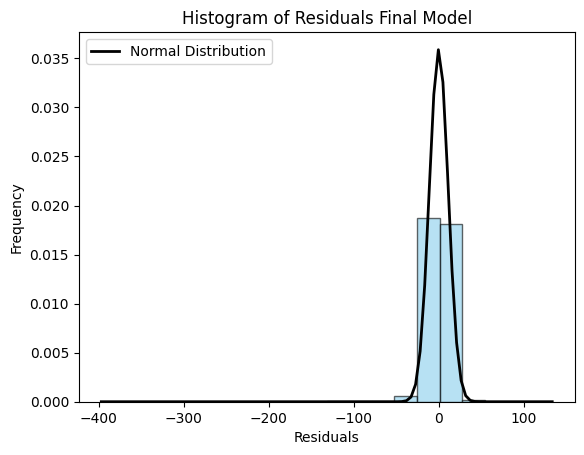

In [ ]:
# Plot histogram of residuals
plt.hist(df_food_1['residuals'], bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals Final Model')

# Generate normal distribution curve with mean and standard deviation of residuals
mu, sigma = np.mean(df_food_1['residuals']), np.std(df_food_1['residuals'])
x = np.linspace(min(df_food_1['residuals']), max(df_food_1['residuals']), 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'k-', linewidth=2, label='Normal Distribution')

plt.legend()
plt.show()


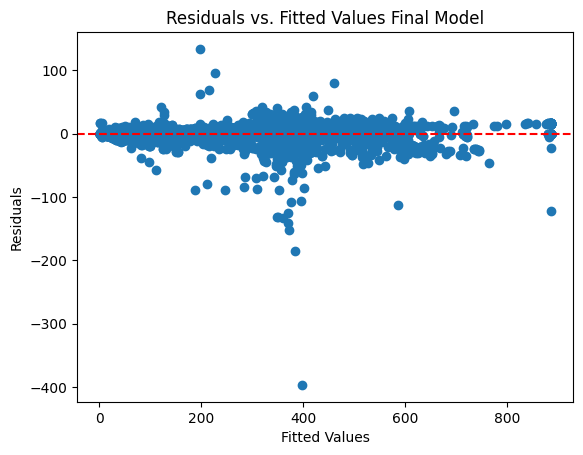

In [ ]:
# Residuals vs. fitted values plot
plt.scatter(df_food_1['predicted_cal'], df_food_1['residuals'])
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Final Model')
plt.show()

In [ ]:
# Create the scatter plot with a trendline
fig = px.scatter(df_food_1, x='predicted_cal', y='calories', trendline='ols', trendline_color_override='black', hover_name='item')

# Set labels and title
fig.update_layout(xaxis_title='Predicted Calories (kcal)', yaxis_title='Calories (kcal)',
                  title='Predicted Calories vs Actual Calories Final Model', height=600, width=800)

# Show the plot
fig.show()

# Get OLS regression results
results = px.get_trendline_results(fig)

# Access and print the summary of OLS regression
results.iloc[0].px_fit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.790e+06
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:31:41   Log-Likelihood:                -29822.
No. Observations:                7793   AIC:                         5.965e+04
Df Residuals:                    7791   BIC:                         5.966e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0210      0.207     -0.102      0.919      -0.427       0.385
x1             1.0004      0.001   1337.764      0.000       0.999       1.002
==============================================================================
Omnibus:                    11938.647   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20601057.168
Skew:                          -9.054   Prob(JB):                         0.00
Kurtosis:                     254.231   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6. Statistical tests.

#### zero-carb vs non zero-carb

In [ ]:
# Splitting the dataset into zero-carb and non-zero-carb
df_zero_carb = df_food_1[df_food_1['carbohydrate'] == 0]
df_non_zero_carb = df_food_1[df_food_1['carbohydrate'] != 0]

# Calculating mean values for cholesterol, fiber, vitamin C, fat, and water content for each group
mean_values_zero_carb = df_zero_carb[['fiber', 'total_fat', 'water']].mean()
mean_values_non_zero_carb = df_non_zero_carb[['fiber', 'total_fat', 'water']].mean()
mean_values_overall = df_food[['fiber', 'total_fat', 'water']].mean()

# Creating a DataFrame for visualization
mean_values_df = pd.DataFrame({
    'Nutrient': ['Fiber', 'Total Fat', 'Water'],
    'Zero Carb': mean_values_zero_carb.values,
    'Non Zero Carb': mean_values_non_zero_carb.values,
    'Overall': mean_values_overall.values
})

# Melting the DataFrame for plotly
melted_df = mean_values_df.melt(id_vars='Nutrient', var_name='Diet Type', value_name='Average (g)')

# Creating a bar plot
fig = px.bar(melted_df, x='Nutrient', y='Average (g)', color='Diet Type', barmode='group',
             title='Average Nutritional Content by Diet Type')
fig.show()

In [ ]:
# Splitting the dataset into zero-carb and non-zero-carb
df_zero_carb = df_food_1[df_food_1['carbohydrate'] == 0]
df_non_zero_carb = df_food_1[df_food_1['carbohydrate'] != 0]

# Calculating mean values for cholesterol, fiber, vitamin C, fat, and water content for each group
mean_values_zero_carb = df_zero_carb[['cholesterol', 'vitamin_c']].mean()
mean_values_non_zero_carb = df_non_zero_carb[['cholesterol', 'vitamin_c']].mean()
mean_values_overall = df_food[['cholesterol', 'vitamin_c']].mean()

# Creating a DataFrame for visualization
mean_values_df = pd.DataFrame({
    'Nutrient': ['Cholesterol', 'Vitamin C'],
    'Zero Carb': mean_values_zero_carb.values,
    'Non Zero Carb': mean_values_non_zero_carb.values,
    'Overall': mean_values_overall.values
})

# Melting the DataFrame for plotly
melted_df = mean_values_df.melt(id_vars='Nutrient', var_name='Diet Type', value_name='Average (mg)')

# Creating a bar plot
fig = px.bar(melted_df, x='Nutrient', y='Average (mg)', color='Diet Type', barmode='group',
             title='Average Nutritional Content by Diet Type')
fig.show()

In [ ]:
mean_values_zero_carb = df_zero_carb[['fiber', 'total_fat', 'water', 'cholesterol', 'vitamin_c']].mean()
mean_values_non_zero_carb = df_non_zero_carb[['fiber', 'total_fat', 'water', 'cholesterol', 'vitamin_c']].mean()
median_values_zero_carb = df_zero_carb[['fiber', 'total_fat', 'water', 'cholesterol', 'vitamin_c']].median()
median_values_non_zero_carb = df_non_zero_carb[['fiber', 'total_fat', 'water', 'cholesterol', 'vitamin_c']].median()

dfs = [mean_values_zero_carb, mean_values_non_zero_carb, median_values_zero_carb, median_values_non_zero_carb]

# Concatenate the dataframes along the columns axis
result = pd.concat(dfs, axis=1)

# Rename the columns
result.columns = ['Avg Zero-Carb', 'Avg Non Zero-Carb', 'Median Zero-Carb', 'Median Non Zero-Carb']

result

Avg Zero-Carb  Avg Non Zero-Carb  Median Zero-Carb  \
fiber             0.000000           2.530681             0.000   
total_fat        15.582214           8.836752             8.395   
water            61.081712          54.124863            64.535   
cholesterol      93.452760          23.565517            78.000   
vitamin_c         0.669411          11.384191             0.000   

             Median Non Zero-Carb  
fiber                        1.10  
total_fat                    3.28  
water                       63.51  
cholesterol                  0.00  
vitamin_c                    0.40

In [ ]:
## %matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
#Create function for determining the conclusion of A/B testing
def results_hyp(t_score, p_value, df):
    def p_val_hyp(p_value):
        alpha = 0.05
        if p_value < alpha:
            return 'Reject null hypothesis'
        else:
            return 'Fail to reject null hypothesis'
    results = {'t-score': [t_score], 'p_value': [p_value], 'dof': [df], 'Conclusion': [p_val_hyp(p_value)]}
    results_df = pd.DataFrame.from_dict(results)
    return results_df

In [ ]:
# Splitting the dataset into zero-carb and non-zero-carb
df_zero_carb = df_food_1[df_food_1['carbohydrate'] == 0]
df_non_zero_carb = df_food_1[df_food_1['carbohydrate'] != 0]


t_score, p_value, df = ttest_ind(df_zero_carb['cholesterol'],
                             df_non_zero_carb['cholesterol'],
                             alternative = 'larger')

results_hyp(t_score, p_value, df)

t-score        p_value     dof              Conclusion
0  23.044368  4.981871e-114  7791.0  Reject null hypothesis

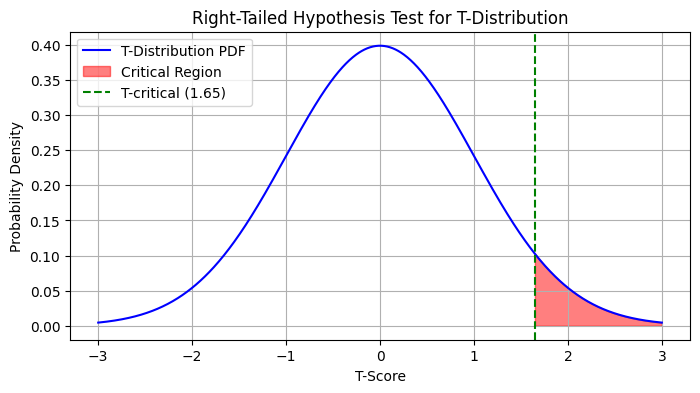

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Significance Level
alpha = 0.05

# Degrees of Freedom for the t-test
n1 = len(df_zero_carb)  # Sample size for zero carb group
n2 = len(df_non_zero_carb)  # Sample size for non-zero carb group
df = n1 + n2 - 2

# T-critical value (for a right-tailed test)
T_crit = t.ppf(1 - alpha, df)

# Generate values for the x-axis (t-distribution)
x = np.linspace(-3, 3, 1000)  # Adjust the range as needed

# Calculate the PDF values
pdf_values = t.pdf(x, df)

# Create a figure and axis for the plot
plt.figure(figsize=(8, 4))
plt.plot(x, pdf_values, label='T-Distribution PDF', color='blue')

# Shade the area in the right tail
plt.fill_between(x, 0, pdf_values, where=(x >= T_crit), color='red', alpha=0.5, label='Critical Region')

# Add a vertical line at the critical value
plt.axvline(x=T_crit, color='green', linestyle='--', label=f'T-critical ({T_crit:.2f})')

# Add labels and legend
plt.xlabel('T-Score')
plt.ylabel('Probability Density')
plt.title('Right-Tailed Hypothesis Test for T-Distribution')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# Splitting the dataset into zero-carb and non-zero-carb
df_zero_carb = df_food_1[df_food_1['carbohydrate'] == 0]
df_non_zero_carb = df_food_1[df_food_1['carbohydrate'] != 0]


t_score, p_value, df = ttest_ind(df_zero_carb['fiber'],
                             df_non_zero_carb['fiber'],
                             alternative = 'smaller')

results_hyp(t_score, p_value, df)

t-score        p_value     dof              Conclusion
0 -24.74257  1.783304e-130  7791.0  Reject null hypothesis

In [ ]:
# Splitting the dataset into zero-carb and non-zero-carb
df_zero_carb = df_food_1[df_food_1['carbohydrate'] == 0]
df_non_zero_carb = df_food_1[df_food_1['carbohydrate'] != 0]


t_score, p_value, df = ttest_ind(df_zero_carb['vitamin_c'],
                             df_non_zero_carb['vitamin_c'],
                             alternative = 'smaller')

results_hyp(t_score, p_value, df)

t-score       p_value     dof              Conclusion
0 -6.407874  7.807106e-11  7791.0  Reject null hypothesis

In [ ]:
# Splitting the dataset into zero-carb and non-zero-carb
df_zero_carb = df_food_1[df_food_1['carbohydrate'] == 0]
df_non_zero_carb = df_food_1[df_food_1['carbohydrate'] != 0]


t_score, p_value, df = ttest_ind(df_zero_carb['total_fat'],
                                 df_non_zero_carb['total_fat'],
                                 alternative = 'larger')

results_hyp(t_score, p_value, df)

t-score       p_value     dof              Conclusion
0  16.498731  1.946434e-60  7791.0  Reject null hypothesis

In [ ]:
# Splitting the dataset into zero-carb and non-zero-carb
df_zero_carb = df_food_1[df_food_1['carbohydrate'] == 0]
df_non_zero_carb = df_food_1[df_food_1['carbohydrate'] != 0]


t_score, p_value, df = ttest_ind(df_zero_carb['water'],
                                 df_non_zero_carb['water'],
                                 alternative = 'two-sided')

results_hyp(t_score, p_value, df)

t-score       p_value     dof              Conclusion
0  9.342859  1.201861e-20  7791.0  Reject null hypothesis

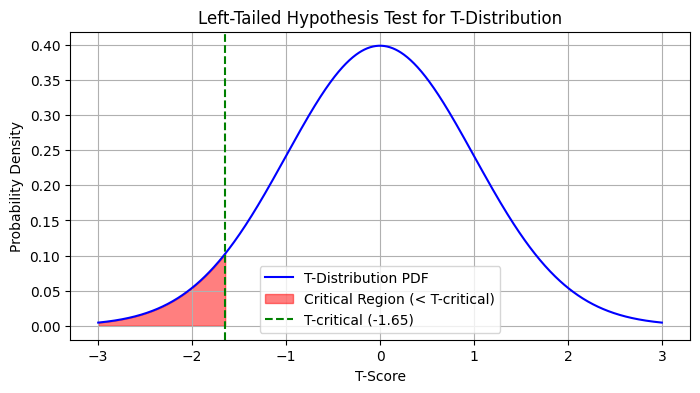

In [ ]:
# Significance Level
alpha = 0.05

# Degrees of Freedom for the t-test
n1 = len(df_zero_carb)  # Sample size for zero carb group
n2 = len(df_non_zero_carb)  # Sample size for non-zero carb group
df = n1 + n2 - 2


# Recalculate T-critical value for the new degrees of freedom
T_crit_left = t.ppf(alpha, df)

# Generate values for the x-axis (t-distribution)
x = np.linspace(-3, 3, 1000)  # Adjusted range for T-score

# Calculate the PDF values
pdf_values = t.pdf(x, df)

# Create a figure and axis for the plot
plt.figure(figsize=(8, 4))
plt.plot(x, pdf_values, label='T-Distribution PDF', color='blue')

# Shade the area in the left tail
plt.fill_between(x, 0, pdf_values, where=(x <= T_crit_left), color='red', alpha=0.5, label='Critical Region (< T-critical)')

# Add a vertical line at the critical valueS
plt.axvline(x=T_crit_left, color='green', linestyle='--', label=f'T-critical ({T_crit_left:.2f})')

# Add labels and legend
plt.xlabel('T-Score')
plt.ylabel('Probability Density')
plt.title('Left-Tailed Hypothesis Test for T-Distribution')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


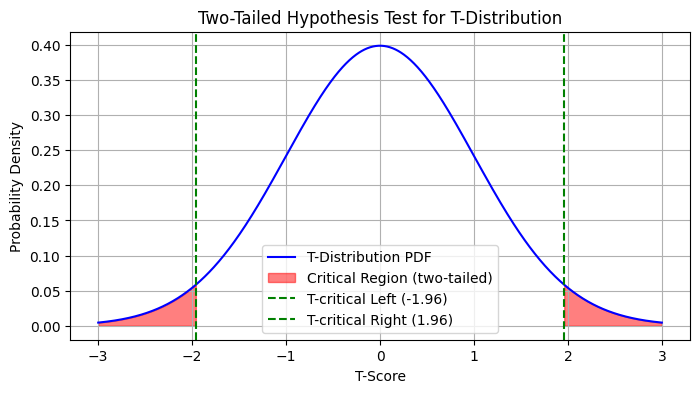

In [ ]:
# Significance Level
alpha = 0.05

# Degrees of Freedom for the t-test
n1 = len(df_zero_carb)  # Sample size for zero carb group
n2 = len(df_non_zero_carb)  # Sample size for non-zero carb group
df = n1 + n2 - 2

# T-critical values (for a two-tailed test)
T_crit_two_tailed_left = t.ppf(alpha / 2, df)
T_crit_two_tailed_right = t.ppf(1 - (alpha / 2), df)

# Create a figure and axis for the plot
plt.figure(figsize=(8, 4))
plt.plot(x, pdf_values, label='T-Distribution PDF', color='blue')

# Shade the areas in both tails
plt.fill_between(x, 0, pdf_values, where=(x <= T_crit_two_tailed_left), color='red', alpha=0.5, label='Critical Region (two-tailed)')
plt.fill_between(x, 0, pdf_values, where=(x >= T_crit_two_tailed_right), color='red', alpha=0.5)

# Add vertical lines at the critical values
plt.axvline(x=T_crit_two_tailed_left, color='green', linestyle='--', label=f'T-critical Left ({T_crit_two_tailed_left:.2f})')
plt.axvline(x=T_crit_two_tailed_right, color='green', linestyle='--', label=f'T-critical Right ({T_crit_two_tailed_right:.2f})')

# Add labels and legend
plt.xlabel('T-Score')
plt.ylabel('Probability Density')
plt.title('Two-Tailed Hypothesis Test for T-Distribution')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


#### high-protein vs non high-protein

In [ ]:
df_food_1['total_mass']=df_food_1['protein']+df_food_1['carbohydrate']+df_food_1['total_fat']+df_food_1['cholesterol']/1000+df_food_1['fiber']+df_food_1['water']+df_food_1['alcohol']+df_food_1['vitamin_c']/1000
df_food_1['percent_protein']=df_food_1['protein']/df_food_1['total_mass']

In [ ]:
# Splitting the dataset into high-protein and non-high-protein
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]

# Calculating mean values for cholesterol, fiber, vitamin C content for each group
mean_values_high_protein = df_high_protein[['cholesterol', 'vitamin_c']].mean()
mean_values_non_high_protein = df_non_high_protein[['cholesterol', 'vitamin_c']].mean()
mean_values_overall = df_food_1[['cholesterol', 'vitamin_c']].mean()

# Creating a DataFrame for visualization
mean_values_df = pd.DataFrame({
    'Nutrient': ['Cholesterol', 'Vitamin C'],
    'High Protein': mean_values_high_protein.values,
    'Non High Protein': mean_values_non_high_protein.values,
    'Overall': mean_values_overall.values
})

# Melting the DataFrame for plotly
melted_df = mean_values_df.melt(id_vars='Nutrient', var_name='Diet Type', value_name='Average (mg)')

# Creating a bar plot
fig = px.bar(melted_df, x='Nutrient', y='Average (mg)', color='Diet Type', barmode='group',
             title='Average Nutritional Content by Diet Type')
fig.show()

In [ ]:
# Splitting the dataset into high-protein and non-high-protein
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]

# Calculating mean values for carbohydrate, fat, and water content for each group
mean_values_high_protein = df_high_protein[['carbohydrate', 'fiber', 'total_fat', 'water']].mean()
mean_values_non_high_protein = df_non_high_protein[['carbohydrate', 'fiber', 'total_fat', 'water']].mean()
mean_values_overall = df_food_1[['carbohydrate', 'fiber', 'total_fat', 'water']].mean()

# Creating a DataFrame for visualization
mean_values_df = pd.DataFrame({
    'Nutrient': ['Carbohydrate', 'Fiber', 'Total Fat', 'Water'],
    'High Protein': mean_values_high_protein.values,
    'Non High Protein': mean_values_non_high_protein.values,
    'Overall': mean_values_overall.values
})

# Melting the DataFrame for plotly
melted_df = mean_values_df.melt(id_vars='Nutrient', var_name='Diet Type', value_name='Average (g)')

# Creating a bar plot
fig = px.bar(melted_df, x='Nutrient', y='Average (g)', color='Diet Type', barmode='group',
             title='Average Nutritional Content by Diet Type')
fig.show()

In [ ]:
# Splitting the dataset into high-protein and non-high-protein
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]

# Calculating mean values for total calories content for each group
mean_values_high_protein = df_high_protein[['calories']].mean()
mean_values_non_high_protein = df_non_high_protein[['calories']].mean()
mean_values_overall = df_food_1[['calories']].mean()

# Creating a DataFrame for visualization
mean_values_df = pd.DataFrame({
    'Nutrient': ['Calories'],
    'High Protein': mean_values_high_protein.values,
    'Non High Protein': mean_values_non_high_protein.values,
    'Overall': mean_values_overall.values
})

# Melting the DataFrame for plotly
melted_df = mean_values_df.melt(id_vars='Nutrient', var_name='Diet Type', value_name='Average')

# Creating a bar plot
fig = px.bar(melted_df, x='Nutrient', y='Average', color='Diet Type', barmode='group',
             title='Average Nutritional Content by Diet Type')
fig.show()

In [ ]:
mean_values_high_protein = df_high_protein[['fiber', 'total_fat', 'carbohydrate', 'water', 'cholesterol', 'vitamin_c', 'calories']].mean()
mean_values_non_high_protein = df_non_high_protein[['fiber', 'total_fat', 'carbohydrate', 'water', 'cholesterol', 'vitamin_c', 'calories']].mean()
median_values_high_protein = df_high_protein[['fiber', 'total_fat', 'carbohydrate', 'water', 'cholesterol', 'vitamin_c', 'calories']].median()
median_values_non_high_protein = df_non_high_protein[['fiber', 'total_fat', 'carbohydrate', 'water', 'cholesterol', 'vitamin_c', 'calories']].median()

dfs = [mean_values_high_protein, mean_values_non_high_protein, median_values_high_protein, median_values_non_high_protein]

# Concatenate the dataframes along the columns axis
result = pd.concat(dfs, axis=1)

# Rename the columns
result.columns = ['Avg High-Protein', 'Avg Non High-Protein', 'Median High-Protein', 'Median Non High-Protein']

result

Avg High-Protein  Avg Non High-Protein  Median High-Protein  \
fiber                   0.7050              1.842229                0.000   
total_fat               6.5855             10.708524                2.995   
carbohydrate           12.0905             19.608376                4.490   
water                  12.0005             56.260645                6.920   
cholesterol            67.8750             42.609313                0.000   
vitamin_c              16.6175              8.402438                0.000   
calories              357.2250            219.536388              351.000   

              Median Non High-Protein  
fiber                            0.00  
total_fat                        5.09  
carbohydrate                     7.61  
water                           64.32  
cholesterol                      5.00  
vitamin_c                        0.00  
calories                       182.00

In [ ]:
# Splitting the dataset into high-protein and non-high-protein
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]


t_score, p_value, df = ttest_ind(df_high_protein['cholesterol'],
                                 df_non_high_protein['cholesterol'],
                                 alternative = 'larger')

results_hyp(t_score, p_value, df)

t-score   p_value     dof                      Conclusion
0  1.291133  0.098348  7791.0  Fail to reject null hypothesis

In [ ]:
# Splitting the dataset into high-protein and non-high-protein
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]


t_score, p_value, df = ttest_ind(df_high_protein['fiber'],
                                 df_non_high_protein['fiber'],
                                 alternative = 'smaller')

results_hyp(t_score, p_value, df)

t-score   p_value     dof              Conclusion
0 -1.714969  0.043195  7791.0  Reject null hypothesis

In [ ]:
# Splitting the dataset into high-protein and non-high-protein
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]


t_score, p_value, df = ttest_ind(df_high_protein['vitamin_c'],
                                 df_non_high_protein['vitamin_c'],
                                 alternative = 'smaller')

results_hyp(t_score, p_value, df)

t-score   p_value     dof                      Conclusion
0  0.784805  0.783704  7791.0  Fail to reject null hypothesis

In [ ]:
# Splitting the dataset into high-protein and non-high-protein
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]


t_score, p_value, df = ttest_ind(df_high_protein['carbohydrate'],
                                 df_non_high_protein['carbohydrate'],
                                 alternative = 'smaller')

results_hyp(t_score, p_value, df)

t-score   p_value     dof              Conclusion
0 -1.845213  0.032522  7791.0  Reject null hypothesis

In [ ]:
# Splitting the dataset into high-protein and non-high-protein
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]


t_score, p_value, df = ttest_ind(df_high_protein['total_fat'],
                                 df_non_high_protein['total_fat'],
                                 alternative = 'smaller')

results_hyp(t_score, p_value, df)

t-score   p_value     dof                      Conclusion
0 -1.58786  0.056179  7791.0  Fail to reject null hypothesis

In [ ]:
# Splitting the dataset into high-protein and non-high-protein
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]


t_score, p_value, df = ttest_ind(df_high_protein['water'],
                                 df_non_high_protein['water'],
                                 alternative = 'smaller')

results_hyp(t_score, p_value, df)

t-score       p_value     dof              Conclusion
0 -9.521772  1.112319e-21  7791.0  Reject null hypothesis

In [ ]:
# Splitting the dataset into high-protein and non-high-protein
df_high_protein = df_food_1[df_food_1['percent_protein']>=0.5]
df_non_high_protein = df_food_1[df_food_1['percent_protein']<0.5]


t_score, p_value, df = ttest_ind(df_high_protein['calories'],
                                 df_non_high_protein['calories'],
                                 alternative = 'larger')

results_hyp(t_score, p_value, df)

t-score       p_value     dof              Conclusion
0  5.155529  1.295680e-07  7791.0  Reject null hypothesis

In [ ]:
n1 = len(df_high_protein)
n2 = len(df_non_high_protein)

n1, n2

(40, 7753)

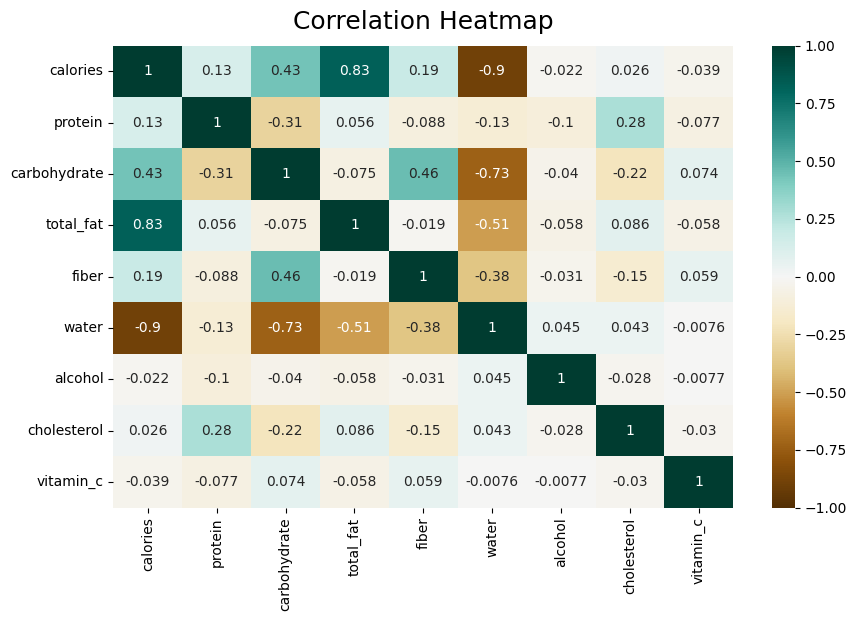

In [ ]:
df_num = df_food[['calories', 'protein', 'carbohydrate', 'total_fat', 'fiber', 'water', 'alcohol', 'cholesterol', 'vitamin_c']]

#Create correlation heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_num.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

df_num = df_food[['calories', 'protein', 'carbohydrate', 'total_fat', 'fiber', 'water', 'alcohol', 'cholesterol', 'vitamin_c']]

# Calculate the correlation matrix
corr_matrix = df_num.corr()

# Create the heatmap
fig = px.imshow(corr_matrix,
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale=px.colors.diverging.BrBG,  # Custom color scale
                zmin=-1, zmax=1,  # Set the scale for the correlation values
                labels=dict(color="Correlation"),
                title="Correlation Heatmap")

# Update the layout to show the correlation values
fig.update_traces(text=corr_matrix.values, texttemplate="%{text:.2f}")

# Show the plot
fig.show()


In [ ]:
n1 = len(df_zero_carb)
n2 = len(df_non_zero_carb)

n1, n2

(2138, 5655)